# KC Roasters

## Context

Coffee roasting is the process of turning green coffee beans into brown ones. Brown coffee beans can be made in a variety of methods, which also influences the flavor of the end product. A roasting instrument is basically a convection oven. It is a mechanism of inflicting heat energy into the raw product which makes the product consumable.
And the price of coffee is heavily influenced by the quality of the beans after roasting. As a result, the cost can be determined depending on the quality of the beans after roasting.

The rising automation in the manufacturing business necessitates the automation of quality inspection of output products with minimal human intervention. Quality inspectors in businesses examine product quality after it is manufactured to ensure that it meets industry standards. 

Each product's quality inspection is a time-consuming manual process, and a low-quality product wastes upstream factory capacity, consumables, labor, and money. With the emerging AI trend, companies are looking to leverage machine learning-based technologies to automate material quality inspection during the manufacturing process to reduce human intervention while achieving human-level or better accuracy.



## Objective

A roasting corporation named "KC Roasters" has engaged you to predict the quality of a roasting instrument's outputs, which will be used to determine the price of coffee beans.
The quality value ranges from 0 to 100 with 0 being the worst and 100 being the best.
and the higher the quality of the beans, the higher the price.

The coffee roasting instrument used by Roasters is divided into five equal-sized compartments, each with three temperature sensors. 3 sensors have been installed at 3 different locations to be able to capture temperature at different locations inside the chamber.
Additionally, the height of raw material (volume entering the chamber) and relative humidity of roasted material is provided

The data shared consists of 17 predictor variables and a continuous target variable, and the aim is to build a Regression model which can accurately predict the quality of the product. After finding out the quality, the company can decide the cost of beans effectively.


## Data Dictionary
- T_data_1_1 - Temperature recorded by 1st sensor in the 1st chamber in Fahrenheit
- T_data_1_2 - Temperature recorded by 2nd sensor in the 1st chamber in Fahrenheit
- T_data_1_3 - Temperature recorded by 3rd sensor in the 1st chamber in Fahrenheit
- T_data_2_1 - Temperature recorded by 1st sensor in the 2nd chamber in Fahrenheit
- T_data_2_2 - Temperature recorded by 2nd sensor in the 2nd chamber in Fahrenheit
- T_data_2_3 - Temperature recorded by 3rd sensor in the 2nd chamber in Fahrenheit
- T_data_3_1 - Temperature recorded by 1st sensor in the 3rd chamber in Fahrenheit
- T_data_3_2 - Temperature recorded by 2nd sensor in the 3rd chamber in Fahrenheit
- T_data_3_3 - Temperature recorded by 3rd sensor in the 3rd chamber in Fahrenheit
- T_data_4_1 - Temperature recorded by 1st sensor in the 4th chamber in Fahrenheit
- T_data_4_2 - Temperature recorded by 2nd sensor in the 4th chamber in Fahrenheit
- T_data_4_3 - Temperature recorded by 3rd sensor in the 4th chamber in Fahrenheit
- T_data_5_1 - Temperature recorded by 1st sensor in the 5th chamber in Fahrenheit
- T_data_5_2 - Temperature recorded by 2nd sensor in the 5th chamber in Fahrenheit
- T_data_5_3 - Temperature recorded by 3rd sensor in the 5th chamber in Fahrenheit
- H_data - Height of Raw material layer, basically represents the volume of raw material going inside the chamber in pounds.
- AH_data - Roasted Coffee beans relative humidity.


## Importing libraries

In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# install imblearn and oversample and undersample data
!pip install imblearn

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.style

plt.style.use("classic")

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)

from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# importing seaborn for statistical plots
import seaborn as sns


# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor,
    StackingRegressor,
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor


# To install xgboost library use - !pip install xgboost
from xgboost import XGBClassifier
from xgboost import XGBRegressor

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)


# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for huper parameter tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")


# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

<IPython.core.display.Javascript object>

## Loading Data

In [2]:
# reading the Training Data
df = pd.read_csv("Roasters.csv")

<IPython.core.display.Javascript object>

In [3]:
# Checking the number of rows and columns in the Training data
df.shape

(29131, 18)

<IPython.core.display.Javascript object>

* The dataset has 29131 rows and 18 columns 

In [4]:
# let's create a copy of the data
data = df.copy()

<IPython.core.display.Javascript object>

In [5]:
# let's view the first 5 rows of the data
data.head()

T_data_1_1  T_data_1_2  T_data_1_3  T_data_2_1  T_data_2_2  T_data_2_3  \
0         212         210         211         347         353         347   
1         212         211         211         346         352         346   
2         212         211         211         345         352         346   
3         213         211         211         344         351         346   
4         213         211         211         343         350         346   

   T_data_3_1  T_data_3_2  T_data_3_3  T_data_4_1  T_data_4_2  T_data_4_3  \
0         474         473         481         346         348         355   
1         475         473         481         349         348         355   
2         476         473         481         352         349         355   
3         477         473         481         355         349         355   
4         478         473         482         358         349         355   

   T_data_5_1  T_data_5_2  T_data_5_3  H_data  AH_data  quality  
0         241         241         243 167.850    9.220       61  
1         241         241         243 162.510    9.220       57  
2         242         241         242 164.990    9.220       61  
3         242         241         242 167.340    9.220       63  
4         243         241         242 163.040    9.220       63

<IPython.core.display.Javascript object>

In [6]:
# let's view the last 5 rows of the data
data.tail()

T_data_1_1  T_data_1_2  T_data_1_3  T_data_2_1  T_data_2_2  T_data_2_3  \
29126         275         276         266         180         376         356   
29127         275         276         266         181         376         355   
29128         275         276         266         183         376         354   
29129         275         276         265         185         376         354   
29130         274         276         265         187         376         353   

       T_data_3_1  T_data_3_2  T_data_3_3  T_data_4_1  T_data_4_2  T_data_4_3  \
29126         495         506         486         341         337         308   
29127         495         507         486         341         337         308   
29128         495         507         486         341         337         307   
29129         495         507         486         341         337         307   
29130         496         508         486         341         337         307   

       T_data_5_1  T_data_5_2  T_data_5_3  H_data  AH_data  quality  
29126         234         220         223 154.120    6.190       77  
29127         234         220         224 158.790    6.190       82  
29128         234         219         224 154.830    6.190       82  
29129         234         219         224 153.680    6.190       82  
29130         234         219         224 155.640    6.190       82

<IPython.core.display.Javascript object>

In [7]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29131 entries, 0 to 29130
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   T_data_1_1  29131 non-null  int64  
 1   T_data_1_2  29131 non-null  int64  
 2   T_data_1_3  29131 non-null  int64  
 3   T_data_2_1  29131 non-null  int64  
 4   T_data_2_2  29131 non-null  int64  
 5   T_data_2_3  29131 non-null  int64  
 6   T_data_3_1  29131 non-null  int64  
 7   T_data_3_2  29131 non-null  int64  
 8   T_data_3_3  29131 non-null  int64  
 9   T_data_4_1  29131 non-null  int64  
 10  T_data_4_2  29131 non-null  int64  
 11  T_data_4_3  29131 non-null  int64  
 12  T_data_5_1  29131 non-null  int64  
 13  T_data_5_2  29131 non-null  int64  
 14  T_data_5_3  29131 non-null  int64  
 15  H_data      29087 non-null  float64
 16  AH_data     29100 non-null  float64
 17  quality     29131 non-null  int64  
dtypes: float64(2), int64(16)
memory usage: 4.0 MB


<IPython.core.display.Javascript object>

In [8]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [9]:
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

T_data_1_1   0.000
T_data_1_2   0.000
T_data_1_3   0.000
T_data_2_1   0.000
T_data_2_2   0.000
T_data_2_3   0.000
T_data_3_1   0.000
T_data_3_2   0.000
T_data_3_3   0.000
T_data_4_1   0.000
T_data_4_2   0.000
T_data_4_3   0.000
T_data_5_1   0.000
T_data_5_2   0.000
T_data_5_3   0.000
H_data       0.150
AH_data      0.110
quality      0.000
dtype: float64

<IPython.core.display.Javascript object>

* H_data is missing 15% of its data
* AH_data is missing 11% of its data

In [10]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

count    mean    std     min     25%     50%     75%      max
T_data_1_1 29131.000 253.552 32.488  13.000 232.000 252.000 280.000  343.000
T_data_1_2 29131.000 254.078 30.025 168.000 231.000 254.000 280.000  341.000
T_data_1_3 29131.000 254.058 28.977 183.000 232.000 252.000 279.000  339.000
T_data_2_1 29131.000 343.076 32.544  70.000 325.000 344.000 363.000  436.000
T_data_2_2 29131.000 344.524 33.719 113.000 326.000 344.000 364.000  598.000
T_data_2_3 29131.000 342.017 31.031 107.000 322.500 343.000 363.000  433.000
T_data_3_1 29131.000 494.513 50.315 311.000 461.000 497.000 524.000 1024.000
T_data_3_2 29131.000 495.851 43.756 401.000 460.000 498.000 527.000  756.000
T_data_3_3 29131.000 500.775 64.996 197.000 460.000 499.000 530.000  934.000
T_data_4_1 29131.000 345.081 43.405  53.000 324.000 343.000 362.000  912.000
T_data_4_2 29131.000 342.738 38.340  51.000 322.000 343.000 362.000  613.000
T_data_4_3 29131.000 345.234 35.052  52.000 326.000 344.000 361.000  695.000
T_data_5_1 29131.000 245.814 25.499 114.000 226.000 245.000 267.000  319.000
T_data_5_2 29131.000 246.304 26.520 145.000 226.000 245.000 266.000  361.000
T_data_5_3 29131.000 245.757 26.051 146.000 225.000 247.000 266.000  374.000
H_data     29087.000 171.127 14.079 144.410 157.350 170.470 182.135  203.680
AH_data    29100.000   7.551  1.123   4.380   6.810   7.520   8.320   10.740
quality    29131.000  64.322 16.397   0.000  54.000  66.000  77.000  100.000

<IPython.core.display.Javascript object>

## EDA and insights

In [11]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Plotting histograms and boxplots for all variables

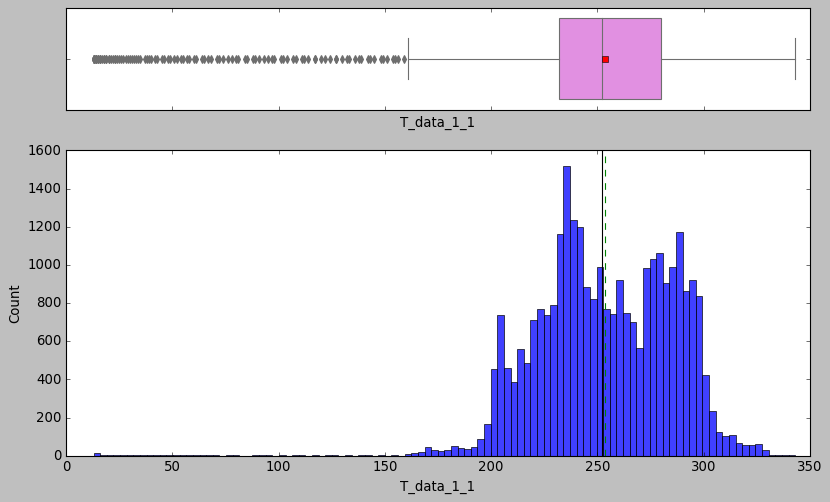

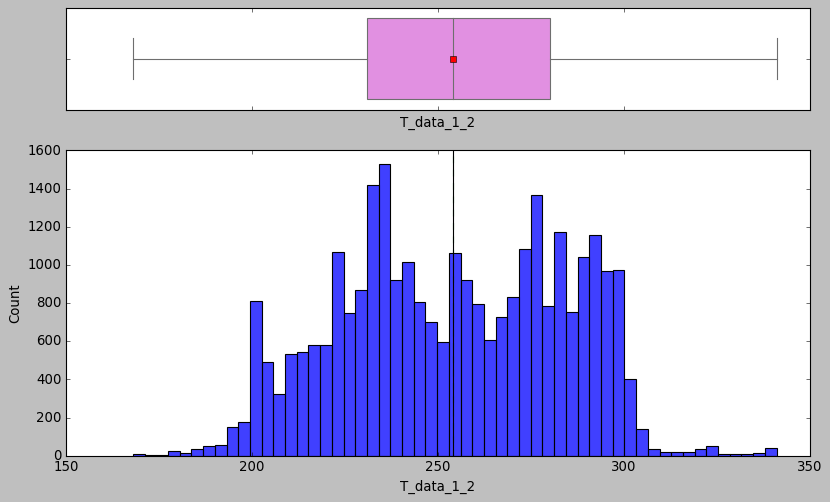

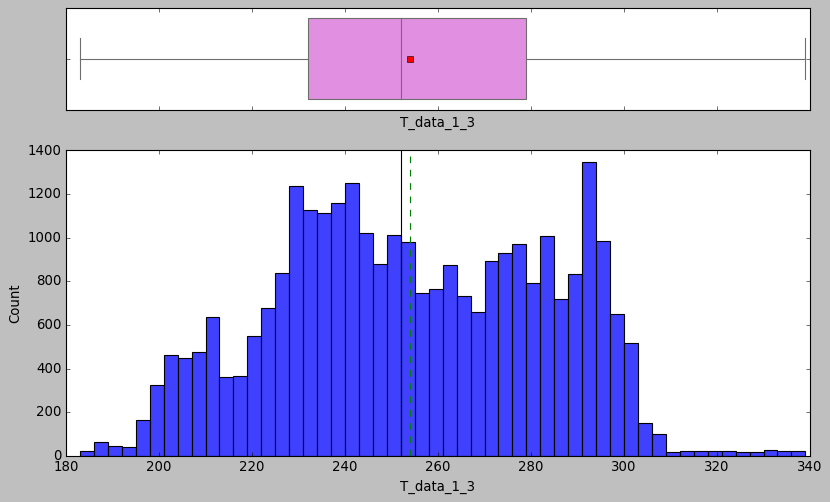

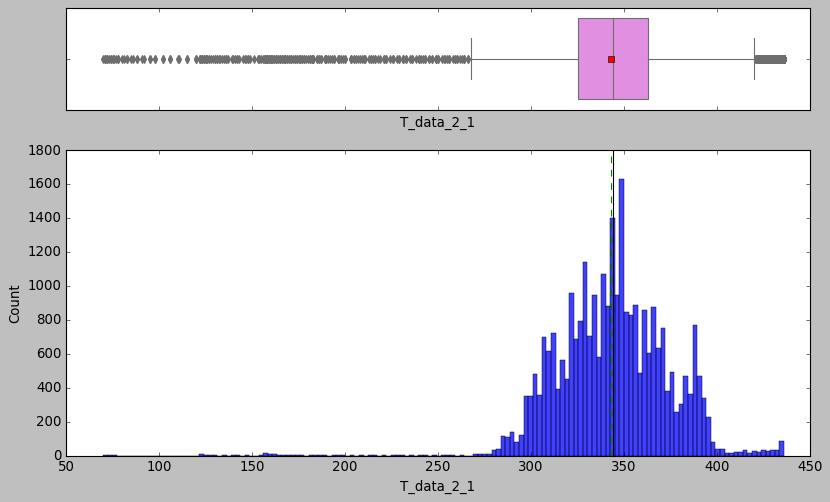

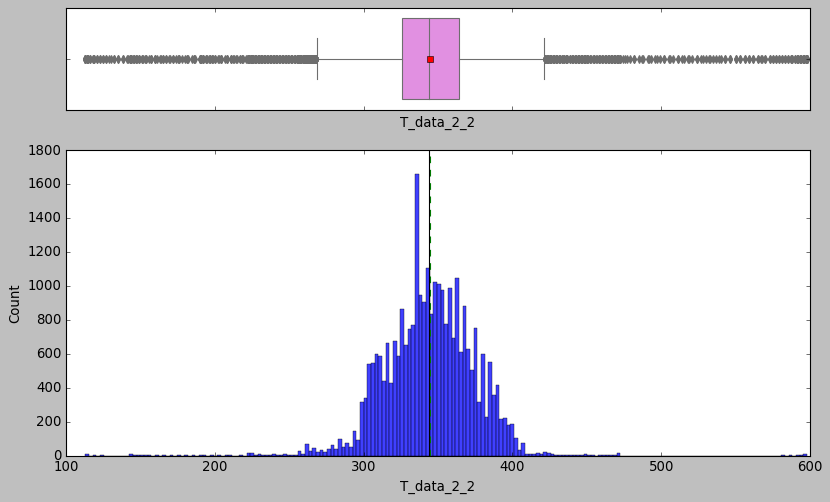

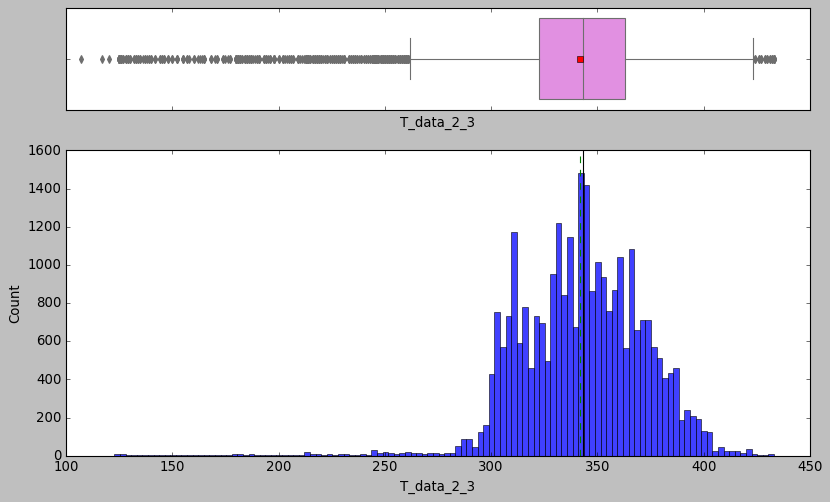

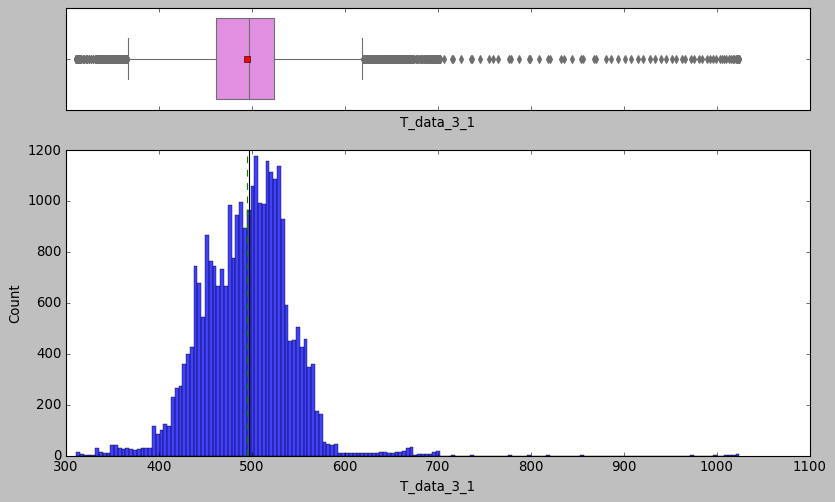

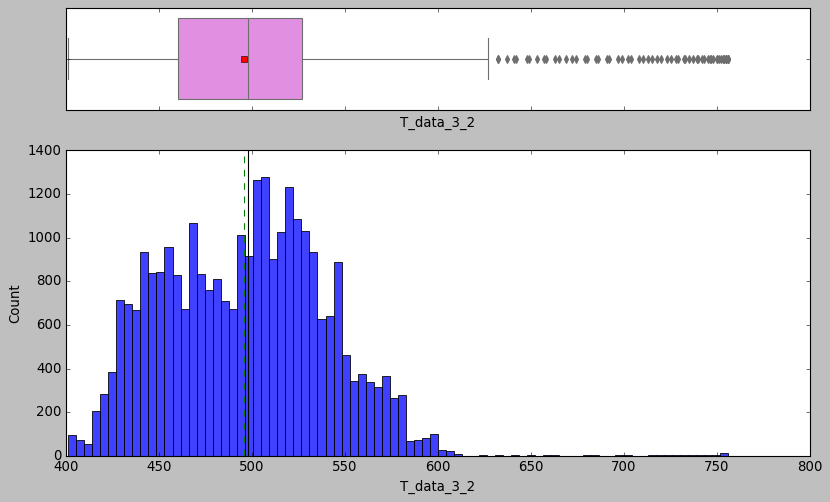

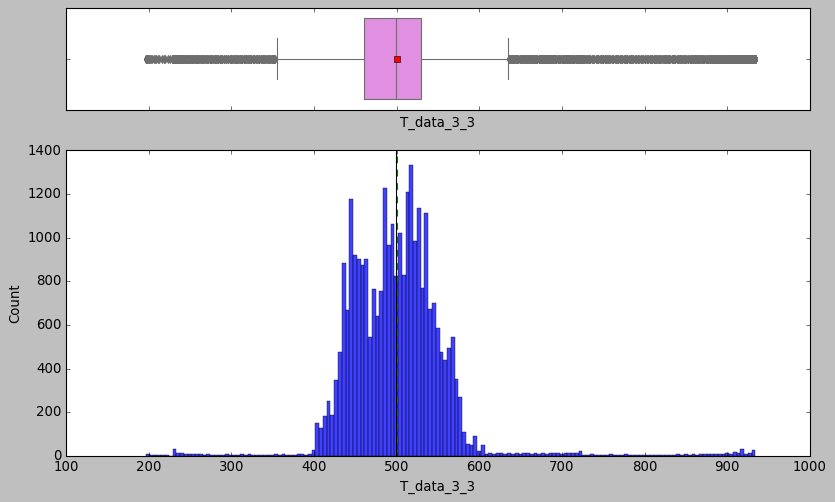

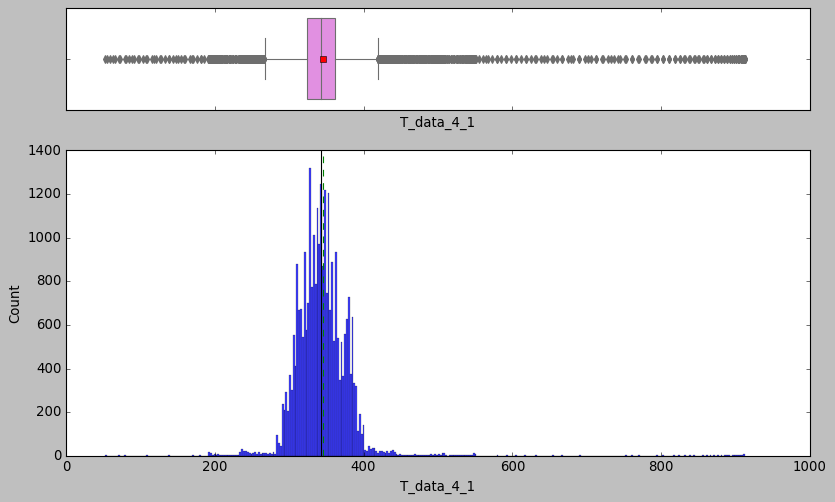

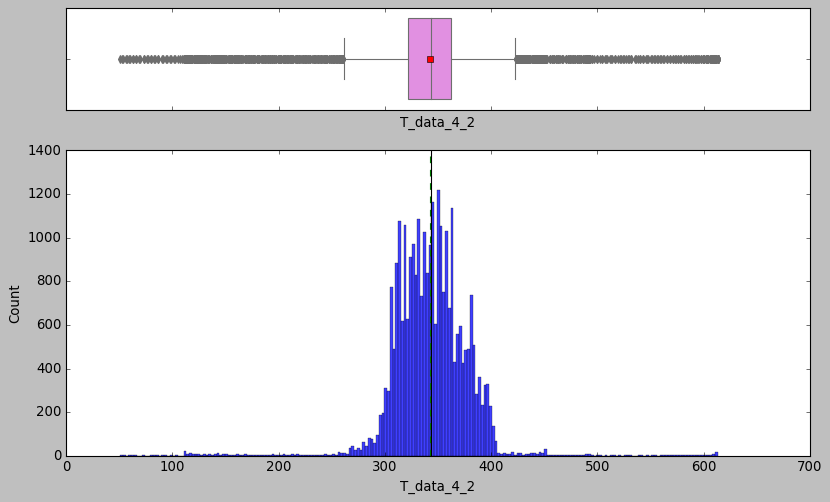

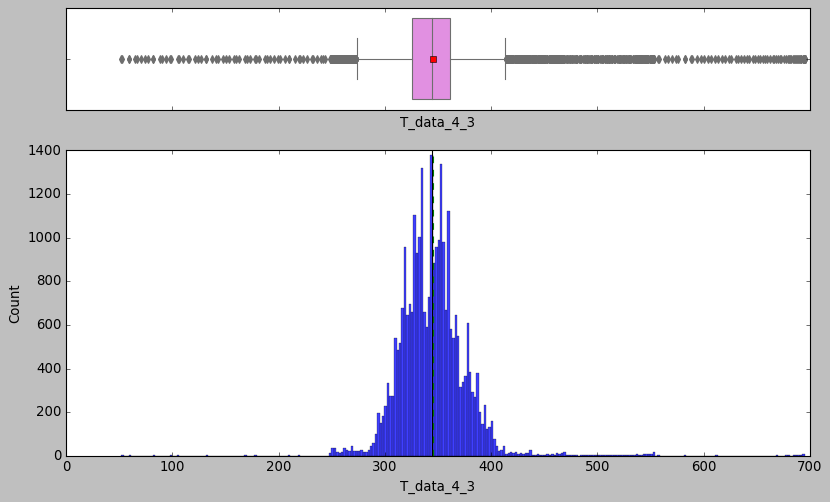

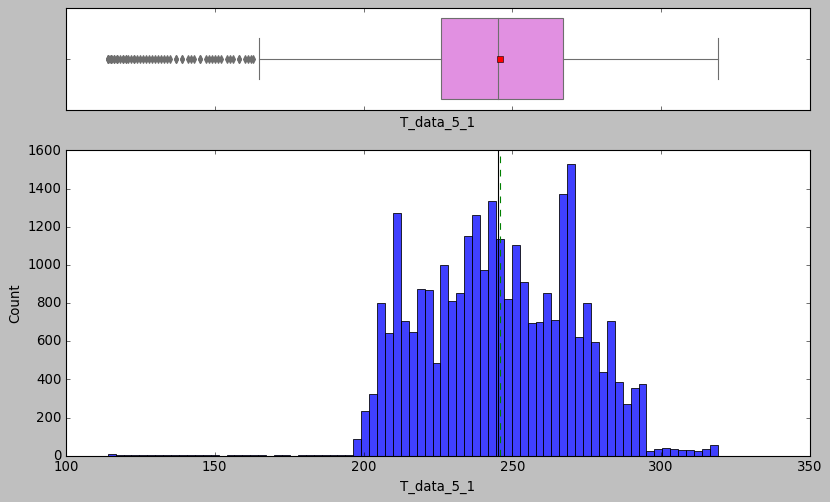

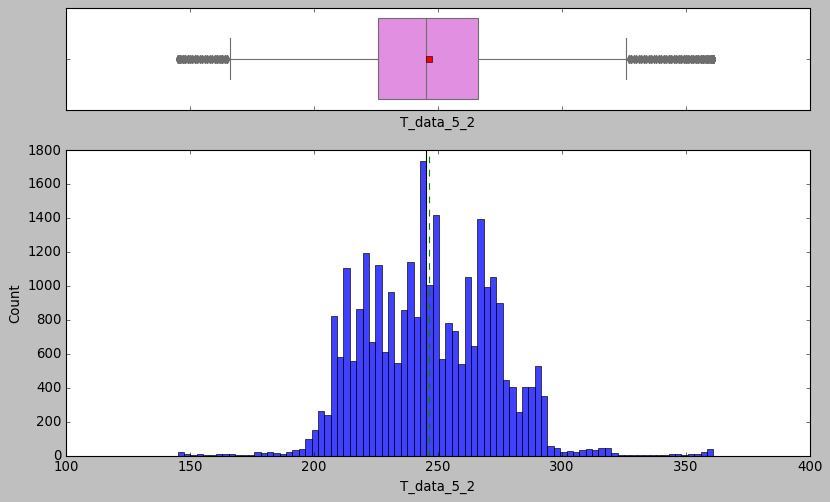

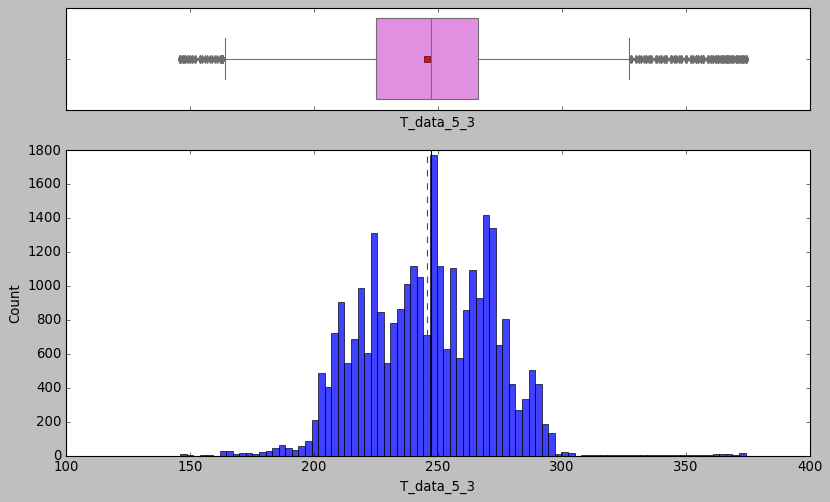

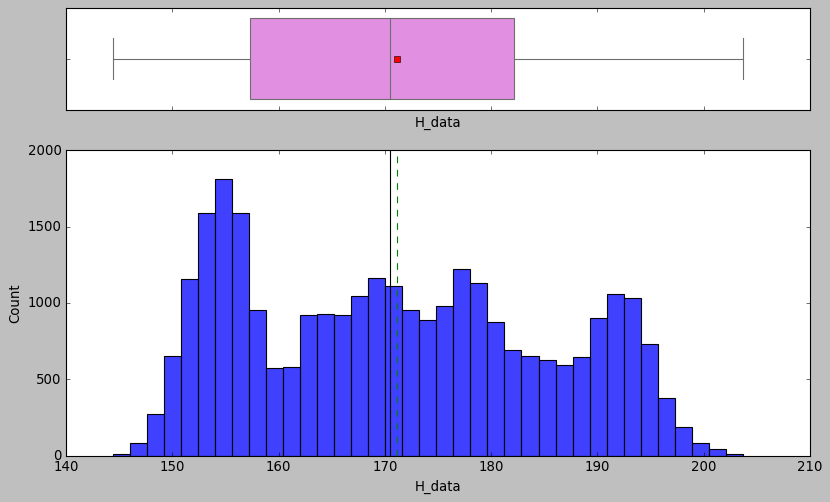

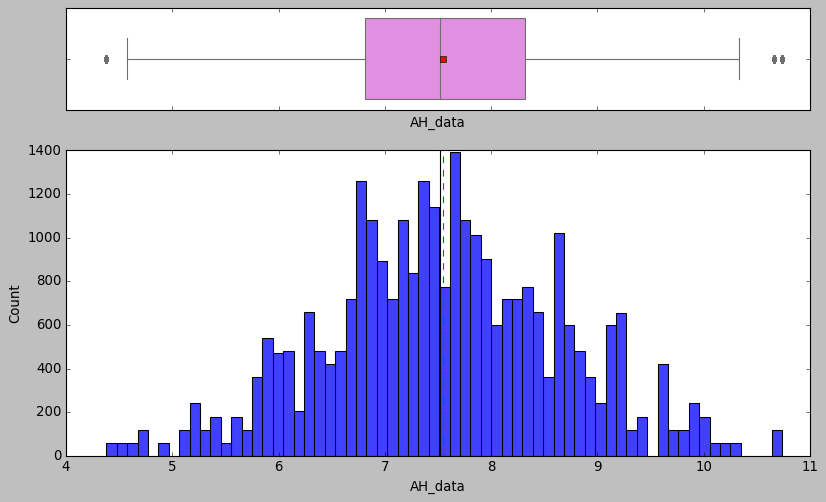

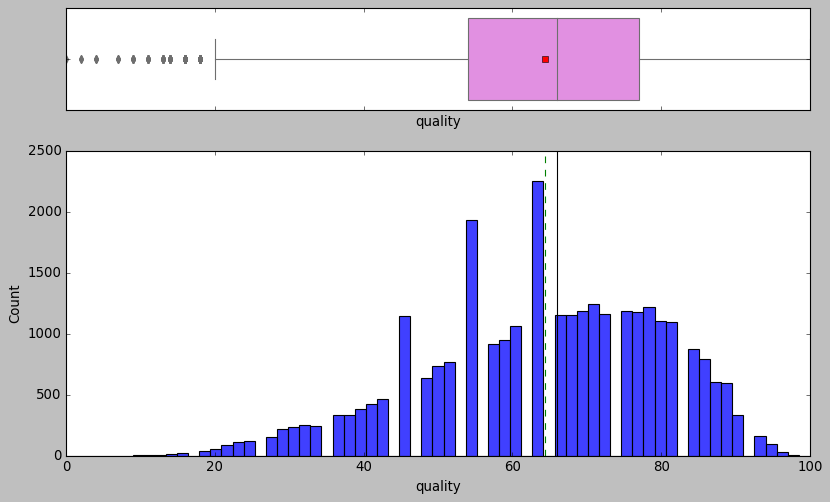

<IPython.core.display.Javascript object>

In [12]:
for feature in df.columns:
    histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None)

* Generally uniform distributions for observations
* Outliers are present


In [13]:
df["quality"].value_counts(1)

71    0.043
79    0.042
70    0.041
75    0.041
77    0.040
73    0.040
68    0.040
66    0.040
63    0.039
64    0.038
80    0.038
82    0.038
61    0.036
54    0.035
59    0.033
57    0.031
55    0.031
84    0.030
86    0.027
52    0.026
50    0.025
48    0.022
46    0.021
88    0.021
89    0.021
45    0.018
43    0.016
41    0.015
39    0.013
91    0.011
36    0.011
38    0.011
32    0.009
34    0.008
30    0.008
29    0.008
93    0.006
27    0.005
25    0.004
23    0.004
95    0.003
21    0.003
20    0.002
18    0.001
96    0.001
16    0.001
14    0.000
13    0.000
11    0.000
98    0.000
9     0.000
7     0.000
4     0.000
100   0.000
2     0.000
0     0.000
Name: quality, dtype: float64

<IPython.core.display.Javascript object>

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

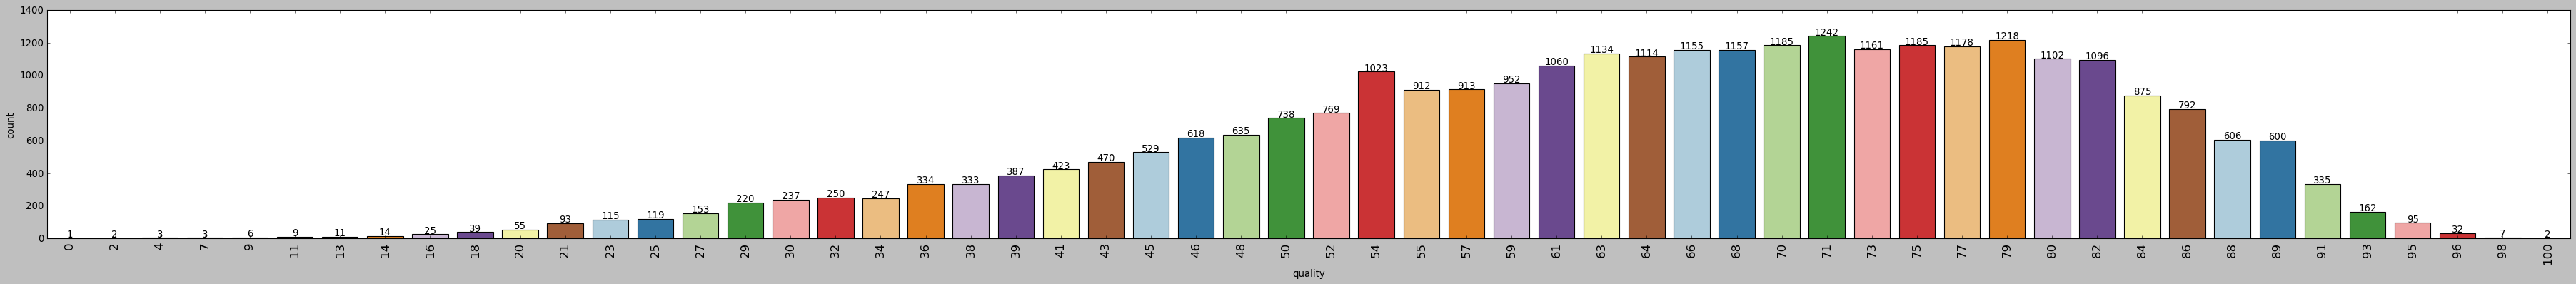

<IPython.core.display.Javascript object>

In [15]:
# observations on Target
labeled_barplot(data, "quality")

* Uniformly distributed on quality , which indicates that there are a batch of variables that appear to impact the overall quality
* Noticed the skew in favor of higher quality 

### Bivariate Analysis

Wall time: 5min 33s


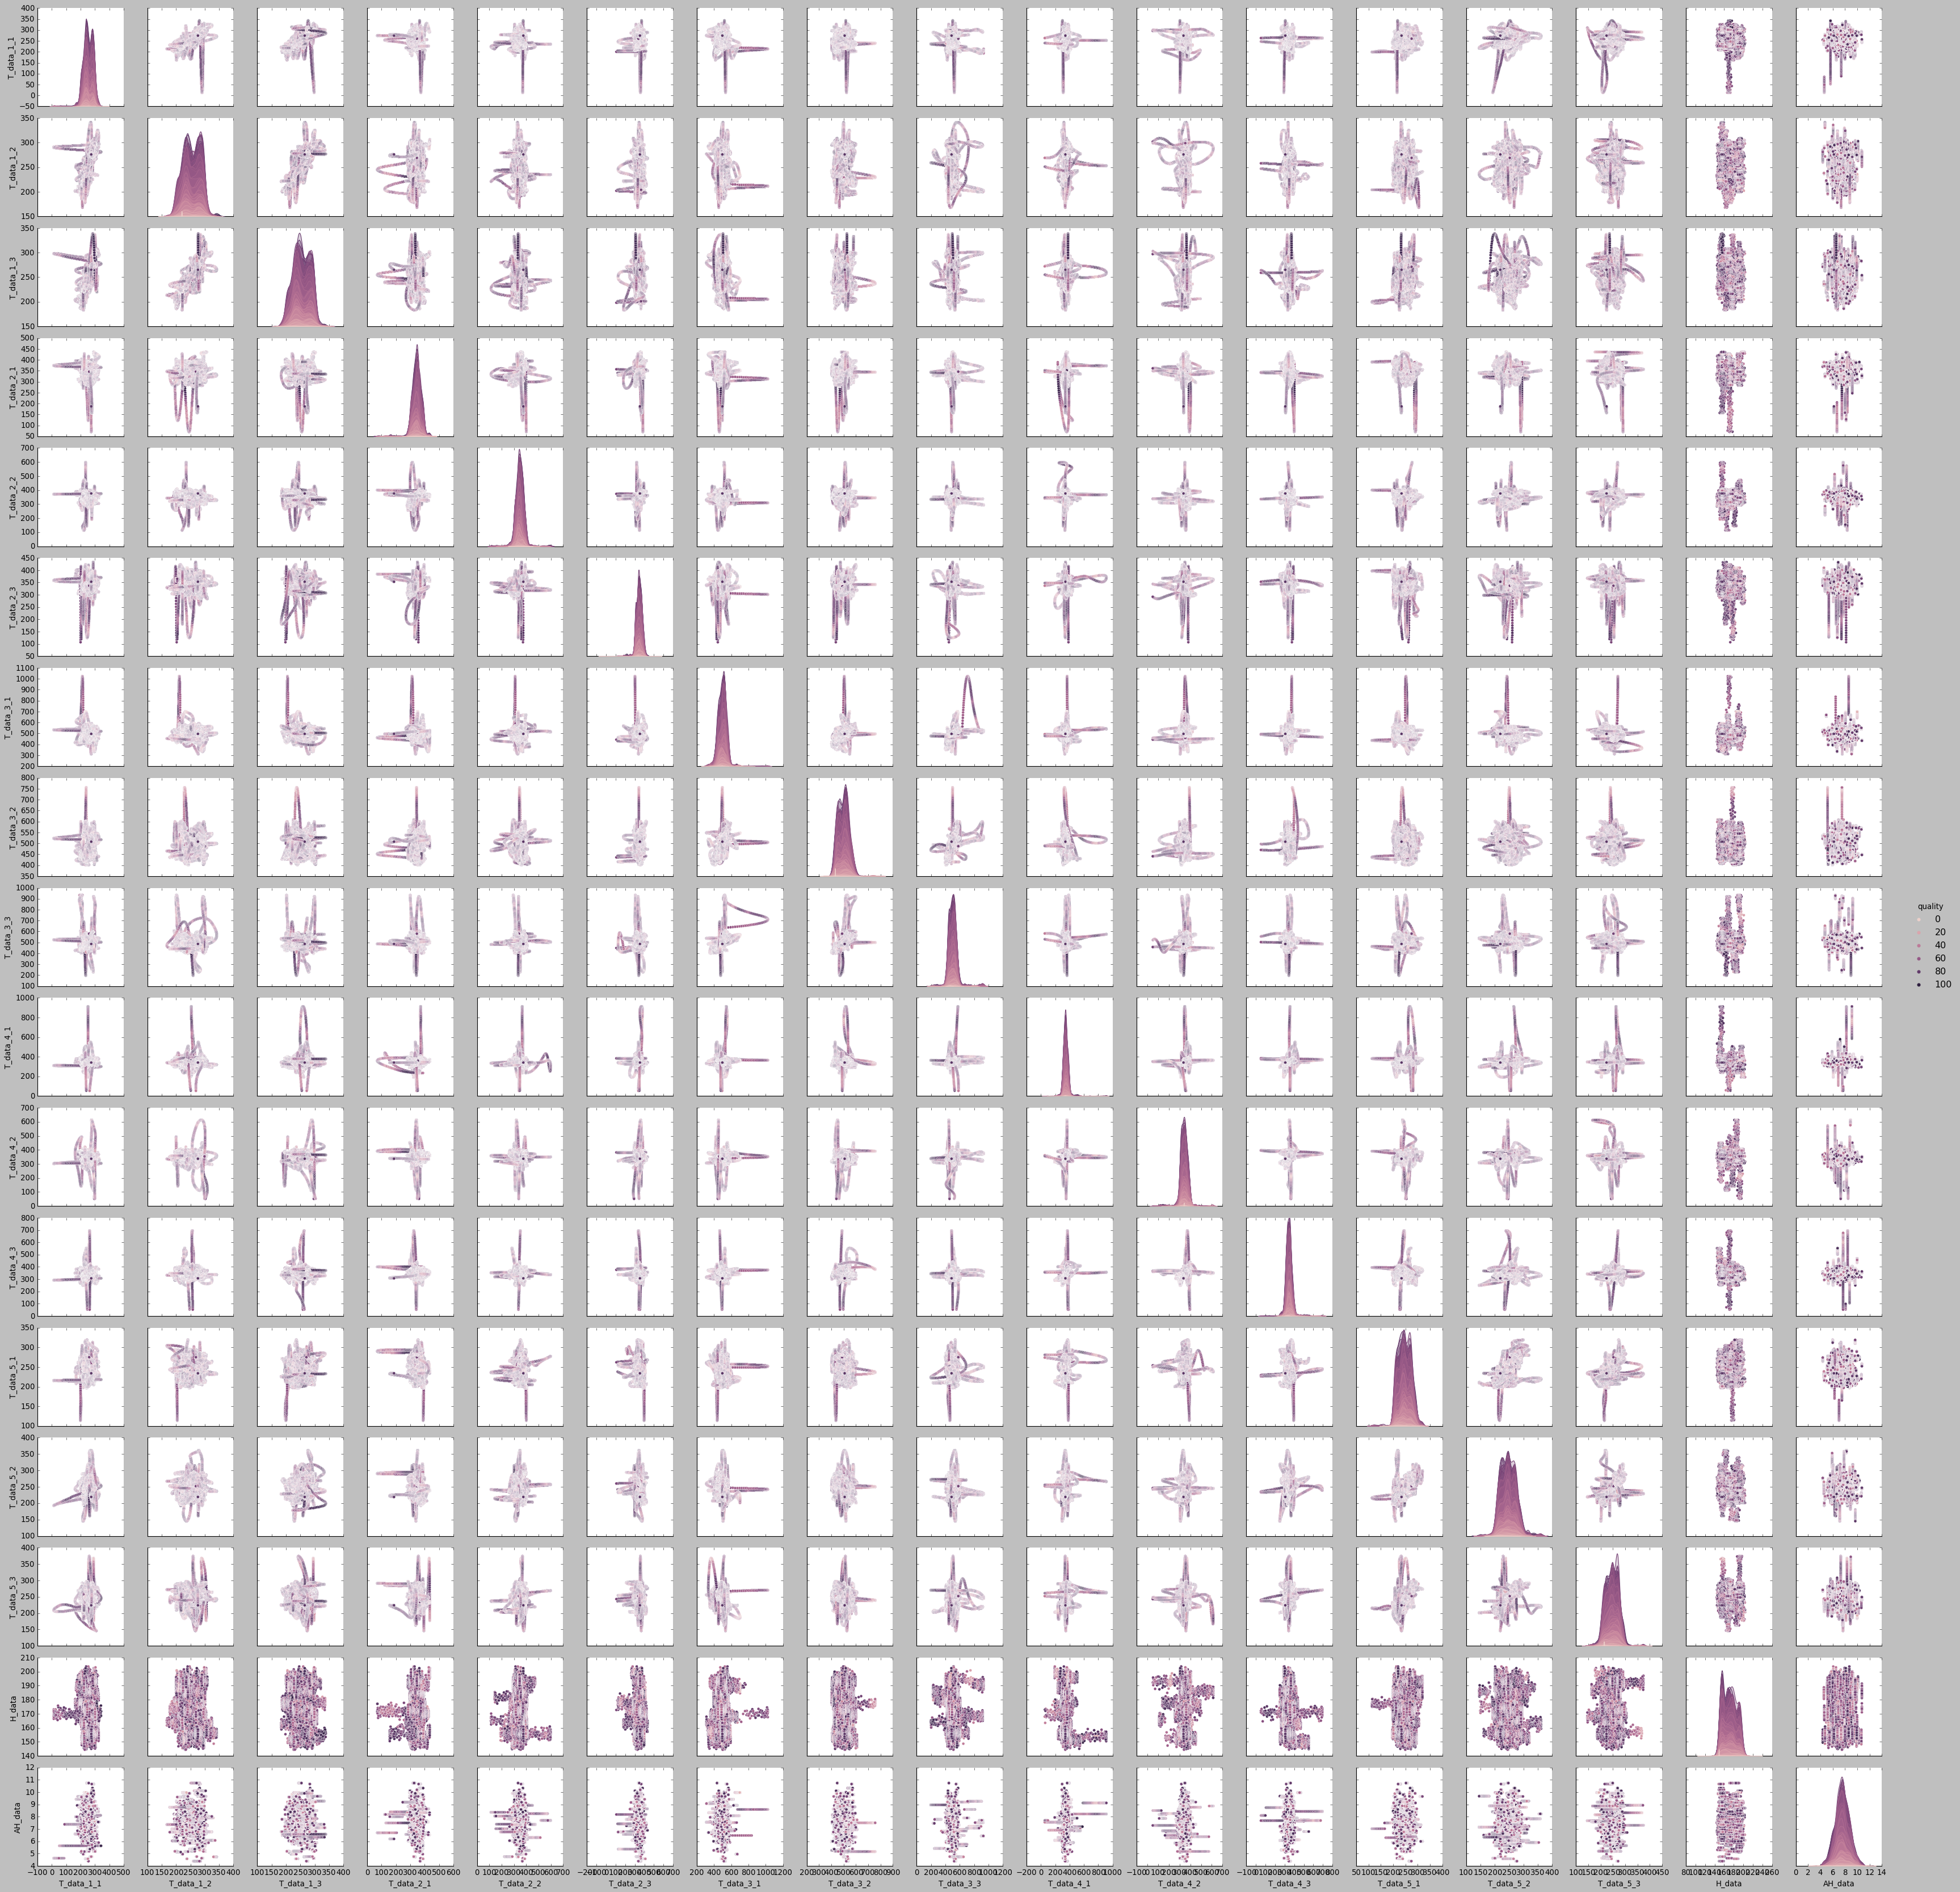

<IPython.core.display.Javascript object>

In [17]:
%%time
sns.pairplot(data, hue="quality")

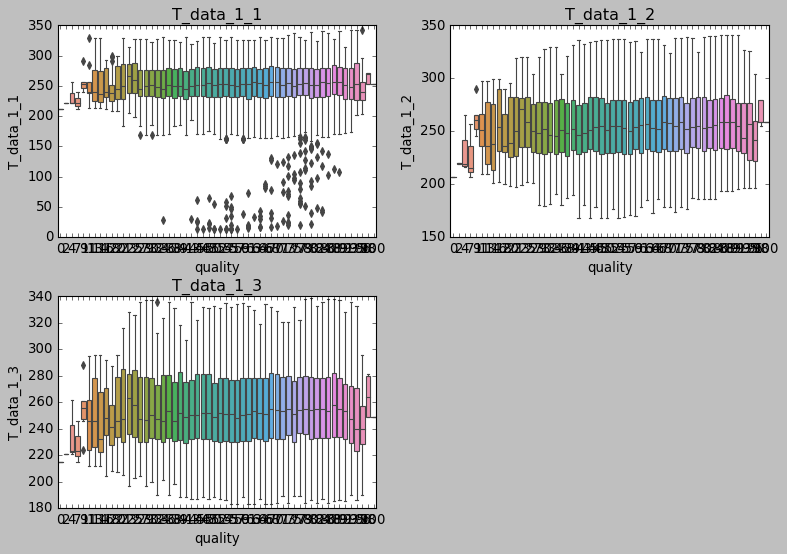

<IPython.core.display.Javascript object>

In [18]:
cols = data[["T_data_1_1", "T_data_1_2", "T_data_1_3"]].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["quality"], data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

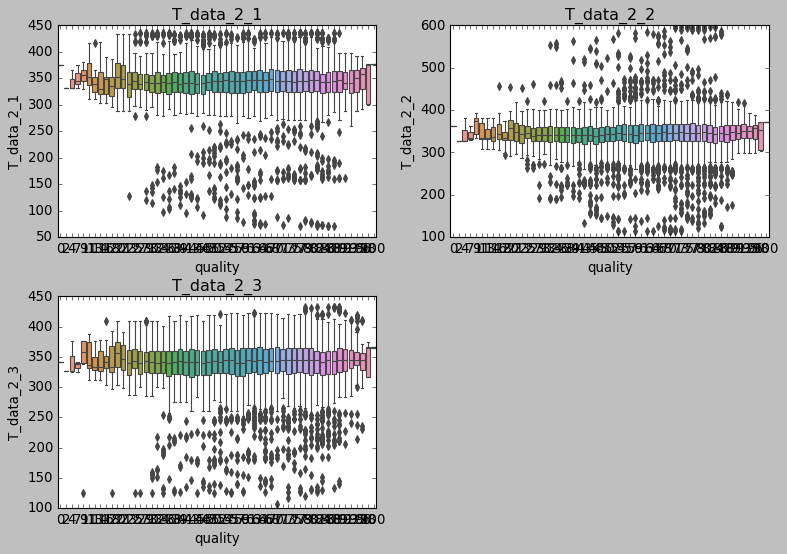

<IPython.core.display.Javascript object>

In [19]:
cols = data[["T_data_2_1", "T_data_2_2", "T_data_2_3"]].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["quality"], data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

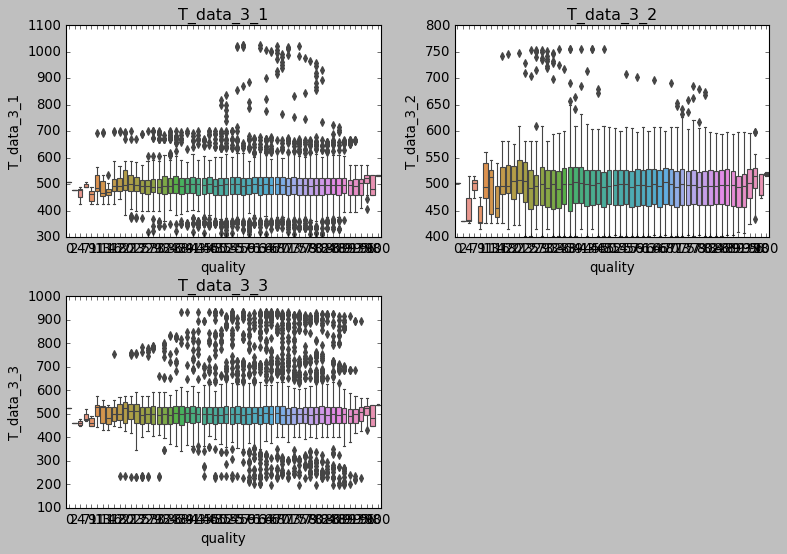

<IPython.core.display.Javascript object>

In [20]:
cols = data[["T_data_3_1", "T_data_3_2", "T_data_3_3"]].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["quality"], data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

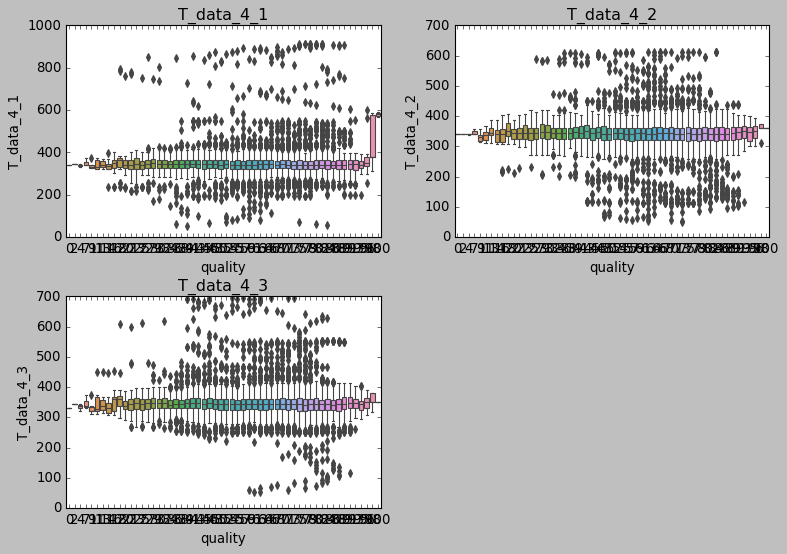

<IPython.core.display.Javascript object>

In [21]:
cols = data[["T_data_4_1", "T_data_4_2", "T_data_4_3"]].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["quality"], data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

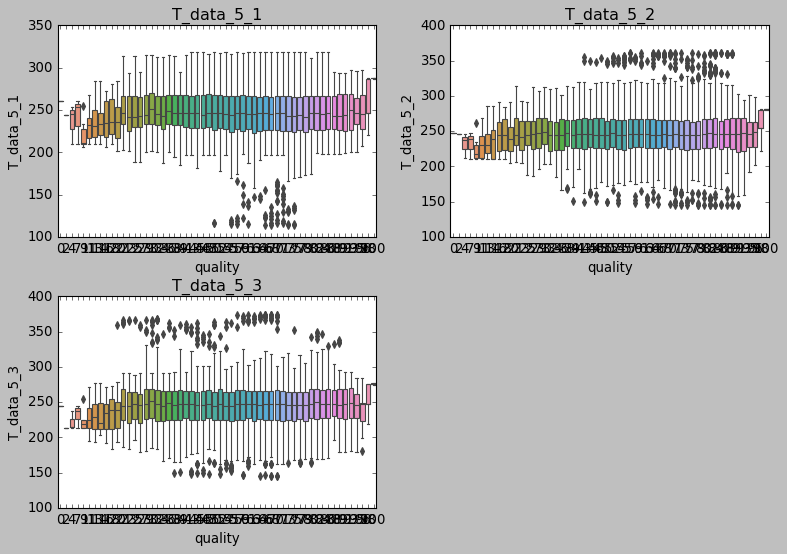

<IPython.core.display.Javascript object>

In [22]:
cols = data[["T_data_5_1", "T_data_5_2", "T_data_5_3"]].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["quality"], data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

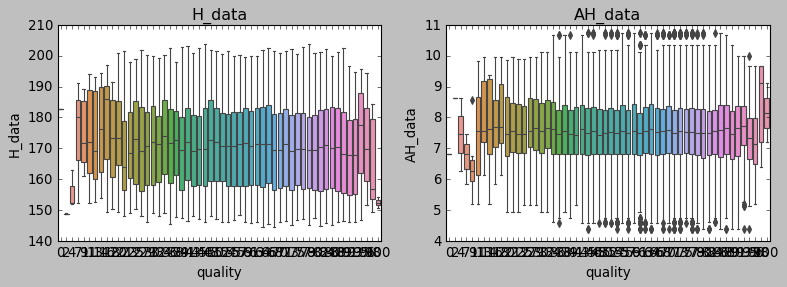

<IPython.core.display.Javascript object>

In [23]:
cols = data[["H_data", "AH_data"]].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["quality"], data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

In [24]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

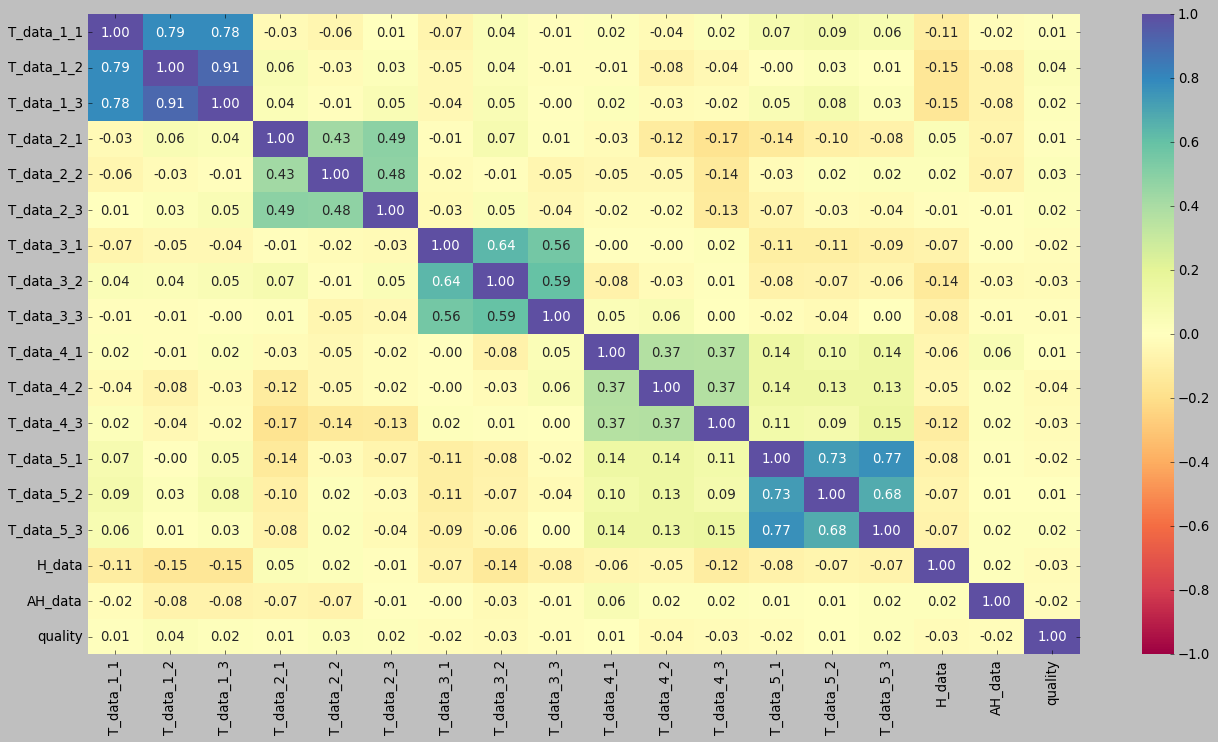

<IPython.core.display.Javascript object>

In [25]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## Data Pre-processing

In [26]:
# quality data
df["quality"].describe()

count   29131.000
mean       64.322
std        16.397
min         0.000
25%        54.000
50%        66.000
75%        77.000
max       100.000
Name: quality, dtype: float64

<IPython.core.display.Javascript object>

In [28]:
# one more copy -
df2 = df.copy()

<IPython.core.display.Javascript object>

In [30]:
df2.shape

(29131, 18)

<IPython.core.display.Javascript object>

* chaning quality column to represent quality representative of the following
* since 50% of data and the mean of data is closely represented, we will use the 50% of data as a cutoff
* <= 65 will represent "0" and > = 66 will represent "1"

In [31]:
df["quality"].where(df["quality"] < 65, 0, inplace=True)
df["quality"].where(df["quality"] > 66, 1, inplace=True)

<IPython.core.display.Javascript object>

In [32]:
df.shape

(29131, 18)

<IPython.core.display.Javascript object>

In [203]:
# 29131 rows and 18 columns - consistant with previous

<IPython.core.display.Javascript object>

In [35]:
# quality data
df["quality"].describe()

count   29131.000
mean        0.521
std         0.500
min         0.000
25%         0.000
50%         1.000
75%         1.000
max         1.000
Name: quality, dtype: float64

<IPython.core.display.Javascript object>

## Data Splitting the dataset

In [110]:
# Dividing data into X and y
X = df.drop(["quality"], axis=1)
y = df["quality"]

<IPython.core.display.Javascript object>

In [111]:
# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(17478, 17) (5826, 17) (5827, 17)


<IPython.core.display.Javascript object>

In [112]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 17478
Number of rows in validation data = 5826
Number of rows in test data = 5827


<IPython.core.display.Javascript object>

### Missing Value Treatment

In [113]:
# Let's impute the missing values
imp_mode = SimpleImputer(missing_values=np.nan, strategy="median")
cols_to_impute = ["H_data", "AH_data"]

# fit and transform the imputer on train data
X_train[cols_to_impute] = imp_mode.fit_transform(X_train[cols_to_impute])

# Transform on validation and test data
X_val[cols_to_impute] = imp_mode.transform(X_val[cols_to_impute])

# fit and transform the imputer on test data
X_test[cols_to_impute] = imp_mode.transform(X_test[cols_to_impute])

<IPython.core.display.Javascript object>

In [114]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())
print("-" * 30)

T_data_1_1    0
T_data_1_2    0
T_data_1_3    0
T_data_2_1    0
T_data_2_2    0
T_data_2_3    0
T_data_3_1    0
T_data_3_2    0
T_data_3_3    0
T_data_4_1    0
T_data_4_2    0
T_data_4_3    0
T_data_5_1    0
T_data_5_2    0
T_data_5_3    0
H_data        0
AH_data       0
dtype: int64
------------------------------
T_data_1_1    0
T_data_1_2    0
T_data_1_3    0
T_data_2_1    0
T_data_2_2    0
T_data_2_3    0
T_data_3_1    0
T_data_3_2    0
T_data_3_3    0
T_data_4_1    0
T_data_4_2    0
T_data_4_3    0
T_data_5_1    0
T_data_5_2    0
T_data_5_3    0
H_data        0
AH_data       0
dtype: int64
------------------------------
T_data_1_1    0
T_data_1_2    0
T_data_1_3    0
T_data_2_1    0
T_data_2_2    0
T_data_2_3    0
T_data_3_1    0
T_data_3_2    0
T_data_3_3    0
T_data_4_1    0
T_data_4_2    0
T_data_4_3    0
T_data_5_1    0
T_data_5_2    0
T_data_5_3    0
H_data        0
AH_data       0
dtype: int64
------------------------------


<IPython.core.display.Javascript object>

### Outlier Treatment

#### check for outliers

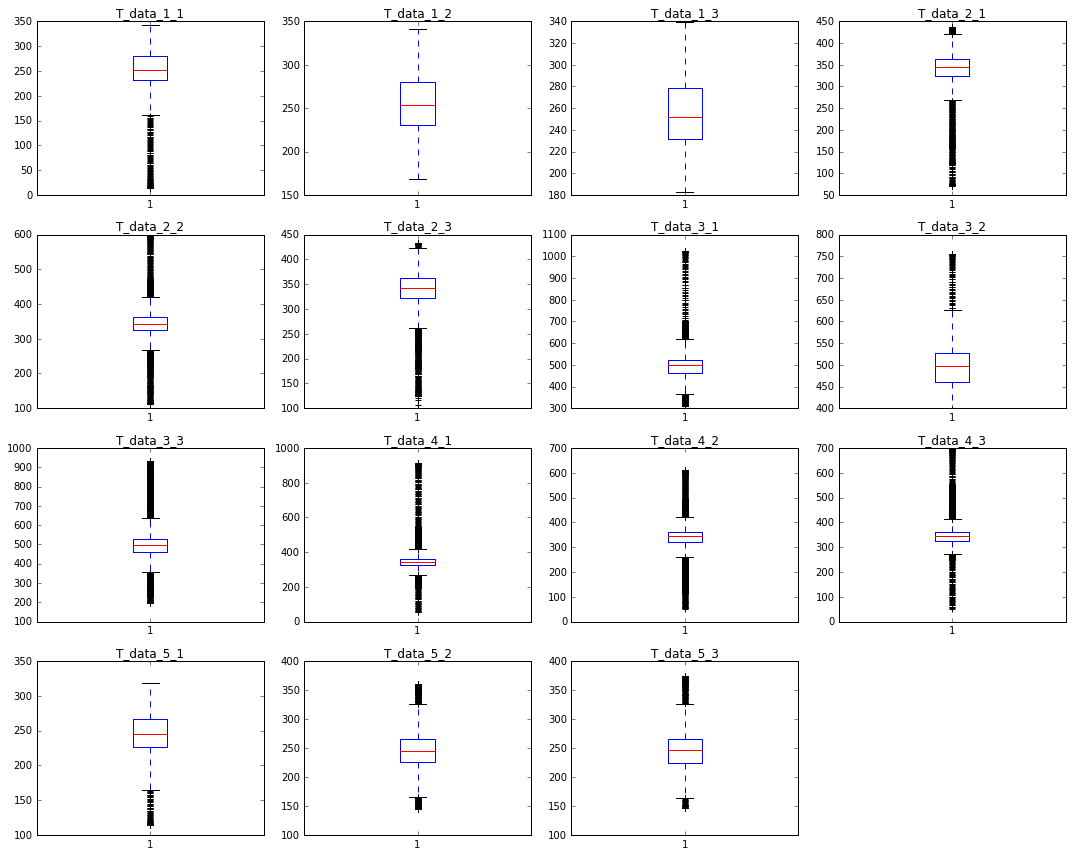

<IPython.core.display.Javascript object>

In [115]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("AH_data")
numeric_columns.remove("H_data")
numeric_columns.remove("quality")


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Observations
* There are quite a few outliers, however we will treat them as they are proper and our modeling will account for these 


## Model evaluation criterion

**Let's create a functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [116]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"RMSE": rmse, "MAE": mae, "R-squared": r2, "Adj. R-squared": adjr2,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [131]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    TP = confusion_matrix(target, model.predict(predictors))[1, 1]
    FP = confusion_matrix(target, model.predict(predictors))[0, 1]
    FN = confusion_matrix(target, model.predict(predictors))[1, 0]
    Cost = TP * 15 + FP * 5 + FN * 40  # maintenance cost by using model
    Min_Cost = (
        TP + FN
    ) * 15  # minimum possible maintenance cost = number of actual positives
    Percent = (
        Min_Cost / Cost
    )  # ratio of minimum possible maintenance cost and maintenance cost by model

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
            "Minimum_Vs_Model_cost": Percent,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [133]:
# defining metric to be used for optimization and with cross-validation
def Minimum_Vs_Model_cost(y_train, y_pred):
    """
    We want the model to optimize the maintenance cost and reduce it to the lowest possible value.
    The lowest possible maintenance cost will be achieved when each sample is predicted correctly.

    In such a scenario, the maintenance cost will be the total number of failures times the maintenance cost of replacing one generator,
    which is given by (TP + FN) * 40 (i.e., the actual positives*40).
    For any other scenario,
    the maintenance cost associated with the model will be given by (TP * 15 + FP * 5 + FN * 40).

    We will use the ratio of these two maintenance costs as the cost function for our model.
    The greater the ratio, the lower the associated maintenance cost and the better the model.
    """
    TP = confusion_matrix(y_train, y_pred)[1, 1]
    FP = confusion_matrix(y_train, y_pred)[0, 1]
    FN = confusion_matrix(y_train, y_pred)[1, 0]
    return ((TP + FN) * 15) / (TP * 15 + FP * 5 + FN * 40)


# A value of .80 here, will represent that the minimum maintenance cost is 80% of the maintenance cost associated with the model.
# Since minimum maintenance cost is constant for any data, when minimum cost will become 100% of maintenance cost associated with the model
# Model will have give the least possible maintenance cost.


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(Minimum_Vs_Model_cost, greater_is_better=True)

# Higher the values, the lower the maintenance cost

<IPython.core.display.Javascript object>

## Model Building

#### original data

In [119]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    #    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = Minimum_Vs_Model_cost(y_val, model.predict(X_val))
    # scores = recall_score(y_train, model.predict(X_train)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic: 60.01888499029152
Bagging: 78.67560814485965
Random forest: 82.5208477090597
GBM: 65.05553175760109
Adaboost: 59.01701917440809
Xgboost: 75.39691231790678
dtree: 78.88653373845041

Validation Performance:

Logistic: 0.5947904426165296
Bagging: 0.8110201175004451
Random forest: 0.845568445475638
GBM: 0.6634867462860472
Adaboost: 0.6001185614543538
Xgboost: 0.7620441619270659
dtree: 0.798860149057431


<IPython.core.display.Javascript object>

In [120]:
%%time

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic: 71.98975404530354
Bagging: 85.74253967929005
Random forest: 89.36454728668262
GBM: 76.28131335604994
Adaboost: 68.0166225802392
Xgboost: 83.99738552331382
dtree: 86.67539965304896

Training Performance:

Logistic: 72.79113159916585
Bagging: 99.02315881900999
Random forest: 100.0
GBM: 79.65097135330919
Adaboost: 71.13379431456481
Xgboost: 91.79014378224124
dtree: 100.0
Wall time: 1min 3s


<IPython.core.display.Javascript object>

* Random Forest overfit
* Decision Tree Overfit
* Bagging overfit
* GBM provided a good consistancy between performance. 
* XGBoost did better overall but there is concern with overfitting the data and it may not be as good on a production run.

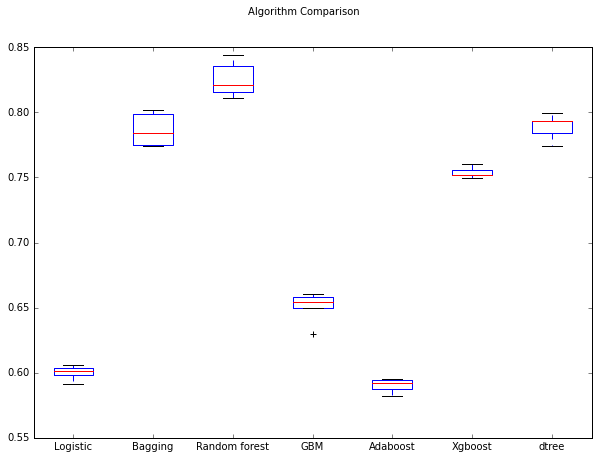

<IPython.core.display.Javascript object>

In [121]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Model Building with Oversampled Data

In [122]:
print("Before UpSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label '1': {} \n".format(sum(y_train == 0)))

sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
# Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After UpSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))

print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label '1': 9111
Before UpSampling, counts of label '1': 8367 

After UpSampling, counts of label '1': 9111
After UpSampling, counts of label '0': 9111 

After UpSampling, the shape of train_X: (18222, 17)
After UpSampling, the shape of train_y: (18222,) 



<IPython.core.display.Javascript object>

In [123]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    #    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = Minimum_Vs_Model_cost(y_val, model.predict(X_val))
    # scores = recall_score(y_train, model.predict(X_train)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic: 50.8859795002641
Bagging: 78.43743026255483
Random forest: 82.20061476881341
GBM: 59.17727403825565
Adaboost: 54.31258945078521
Xgboost: 74.30133083121132
dtree: 78.2715589054785

Validation Performance:

Logistic: 0.5071810287241149
Bagging: 0.8054990717001149
Random forest: 0.8384870237437879
GBM: 0.5937825860271115
Adaboost: 0.5537255378631336
Xgboost: 0.7480909762706298
dtree: 0.8017423442449841


<IPython.core.display.Javascript object>

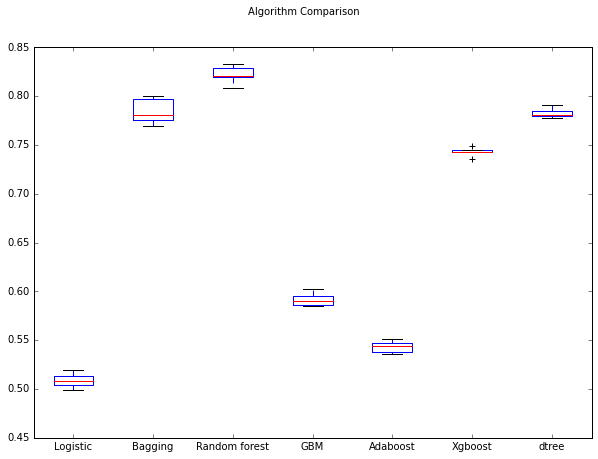

<IPython.core.display.Javascript object>

In [124]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

* Bagging, Random forest and Decision Tree did well
* Logistic, GBM, Adaboost did poorly 
* Clearly helped with overfitting of data 


### Model Building with Undersampled Data

In [125]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {}".format(sum(y_train == 0)))

print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_un == 0)))

print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {}".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 9111
Before UnderSampling, counts of label '0': 8367
After UnderSampling, counts of label '1': 8367
After UnderSampling, counts of label '0': 8367
After UnderSampling, the shape of train_X: (16734, 17)
After UnderSampling, the shape of train_y: (16734,)


<IPython.core.display.Javascript object>

In [126]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    #    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = Minimum_Vs_Model_cost(y_val, model.predict(X_val))
    # scores = recall_score(y_train, model.predict(X_train)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic: 50.60611673350227
Bagging: 77.44973626709573
Random forest: 80.89262873205234
GBM: 59.34867819282707
Adaboost: 54.73000726875097
Xgboost: 74.1667564200968
dtree: 77.24611088164617

Validation Performance:

Logistic: 0.5114516672280229
Bagging: 0.789377924103275
Random forest: 0.8305378304466727
GBM: 0.5983843425719164
Adaboost: 0.5620257849608291
Xgboost: 0.7438765512736774
dtree: 0.7889677866297194


<IPython.core.display.Javascript object>

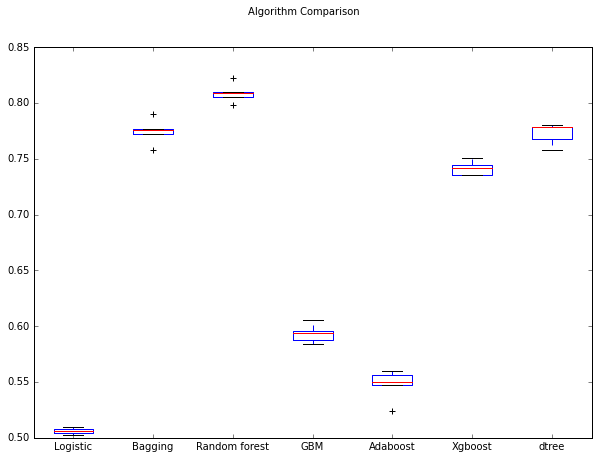

<IPython.core.display.Javascript object>

In [127]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Tuning Bagging using Oversampled Data

In [128]:
%%time

# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearch CV
param_grid = {'max_samples': [.07,0.8,0.9,1],'max_features': [0.7,0.8,0.9,1],'n_estimators': [10,20,30,40,50]}

# Calling RandomizedSearch CV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring= scorer, cv=5, random_state=1) 

#Fitting parameters in RandomizedSearch CV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score= {}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'max_samples': 0.9, 'max_features': 0.8} with CV score= 0.814850035875188:
Wall time: 1min 3s


<IPython.core.display.Javascript object>

In [129]:
# Creating new pipeline with best parameters
tuned_bag2 = BaggingClassifier(
    max_features=0.8, random_state=1, max_samples=0.9, n_estimators=50
)

tuned_bag2.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

<IPython.core.display.Javascript object>

In [137]:
bag2_val_perf = model_performance_classification_sklearn(tuned_bag2, X_train, y_train)
bag2_val_perf

Accuracy  Recall  Precision    F1  Minimum_Vs_Model_cost
0     0.999   0.998      0.999 0.999                  0.997

<IPython.core.display.Javascript object>

In [138]:
bag2_val_perf = model_performance_classification_sklearn(tuned_bag2, X_val, y_val)
bag2_val_perf

Accuracy  Recall  Precision    F1  Minimum_Vs_Model_cost
0     0.896   0.893      0.907 0.900                  0.827

<IPython.core.display.Javascript object>

### XGBoost using undersampled data

In [151]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomSearch CV
param_grid = {'n_estimators':np.arange(150,300,50), 'scale_pos_weight':[5,10],'learning_rate':[0.1,0.2],'gamma':[0,3,5], 'subsample':[0.8,0.9]}

# Calling RandomizedSearch CV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring= scorer, cv=5, random_state=1) 

#Fitting parameters in RandomizedSearch CV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score= {}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 5, 'n_estimators': 250, 'learning_rate': 0.2, 'gamma': 0} with CV score= 0.8297688279707313:
Wall time: 3min 49s


<IPython.core.display.Javascript object>

In [152]:
xgb2 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=5,
    n_estimators=250,
    learning_rate=0.2,
    gamma=0,
)

xgb2.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [153]:
xgb2_train_perf = model_performance_classification_sklearn(
    xgb2, X_train_over, y_train_over
)
xgb2_train_perf

Accuracy  Recall  Precision    F1  Minimum_Vs_Model_cost
0     0.881   0.999      0.808 0.893                  0.925

<IPython.core.display.Javascript object>

### Random Forest with Undersampled data

In [147]:
%%time

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid ={"n_estimators": [100,150,250], 
             "min_samples_leaf": np.arange(1,6), 
             "max_features": [np.arange(0.3,0.6,0.1),'sqrt','log2'],
             "max_samples":np.arange(0.2, 0.6,0.1)}

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:".format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.5000000000000001, 'max_features': 'sqrt'} with CV score=0.797697077320304:
Wall time: 1min 25s


<IPython.core.display.Javascript object>

In [148]:
# Creating new pipeline with best parameters
tuned_rf2 = RandomForestClassifier(
    max_features="sqrt",
    random_state=1,
    max_samples=0.5000000000000001,
    n_estimators=250,
    min_samples_leaf=1,
)

tuned_rf2.fit(X_train_over, y_train_over)

RandomForestClassifier(max_features='sqrt', max_samples=0.5000000000000001,
                       n_estimators=250, random_state=1)

<IPython.core.display.Javascript object>

In [149]:
rf2_train_perf = model_performance_classification_sklearn(
    tuned_rf2, X_train_over, y_train_over
)
rf2_train_perf

Accuracy  Recall  Precision    F1  Minimum_Vs_Model_cost
0     0.986   0.985      0.987 0.986                  0.972

<IPython.core.display.Javascript object>

In [150]:
rf2_val_perf = model_performance_classification_sklearn(tuned_rf2, X_val, y_val)
rf2_val_perf

Accuracy  Recall  Precision    F1  Minimum_Vs_Model_cost
0     0.890   0.888      0.900 0.894                  0.820

<IPython.core.display.Javascript object>

In [158]:
# training performance comparison

models_train_comp_df = pd.concat(
    [bag2_val_perf.T, xgb2_train_perf.T, rf2_train_perf.T,], axis=1
)
models_train_comp_df.columns = [
    "Bagging classifier tuned with oversampled data",
    "Random Forest tuned with oversampled data",
    "XGBoost tuned with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Bagging classifier tuned with oversampled data  \
Accuracy                                                        0.896   
Recall                                                          0.893   
Precision                                                       0.907   
F1                                                              0.900   
Minimum_Vs_Model_cost                                           0.827   

                       Random Forest tuned with oversampled data  \
Accuracy                                                   0.881   
Recall                                                     0.999   
Precision                                                  0.808   
F1                                                         0.893   
Minimum_Vs_Model_cost                                      0.925   

                       XGBoost tuned with undersampled data  
Accuracy                                              0.986  
Recall                                                0.985  
Precision                                             0.987  
F1                                                    0.986  
Minimum_Vs_Model_cost                                 0.972

<IPython.core.display.Javascript object>

In [161]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [bag2_val_perf.T, xgb2_train_perf.T, rf2_val_perf.T,], axis=1,
)

models_val_comp_df.columns = [
    "Bagging classifier tuned with oversampled data",
    "Random Forest tuned with oversampled data",
    "XGBoost tuned with undersampled data",
]

print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


Bagging classifier tuned with oversampled data  \
Accuracy                                                        0.896   
Recall                                                          0.893   
Precision                                                       0.907   
F1                                                              0.900   
Minimum_Vs_Model_cost                                           0.827   

                       Random Forest tuned with oversampled data  \
Accuracy                                                   0.881   
Recall                                                     0.999   
Precision                                                  0.808   
F1                                                         0.893   
Minimum_Vs_Model_cost                                      0.925   

                       XGBoost tuned with undersampled data  
Accuracy                                              0.890  
Recall                                                0.888  
Precision                                             0.900  
F1                                                    0.894  
Minimum_Vs_Model_cost                                 0.820

<IPython.core.display.Javascript object>

* Random Forest performed overall better than the other models. While it was not quite as precise, the accuracy, recall and ovedrall performance made it the model of choice.

### Test performance

In [162]:
bag2_val_perf.T, xgb2_train_perf.T, rf2_val_perf.T

(                          0
 Accuracy              0.896
 Recall                0.893
 Precision             0.907
 F1                    0.900
 Minimum_Vs_Model_cost 0.827,
                           0
 Accuracy              0.881
 Recall                0.999
 Precision             0.808
 F1                    0.893
 Minimum_Vs_Model_cost 0.925,
                           0
 Accuracy              0.890
 Recall                0.888
 Precision             0.900
 F1                    0.894
 Minimum_Vs_Model_cost 0.820)

<IPython.core.display.Javascript object>

#### Random Forest had a consistant performance on both over and undersampled and seems to provide the best working model from above.

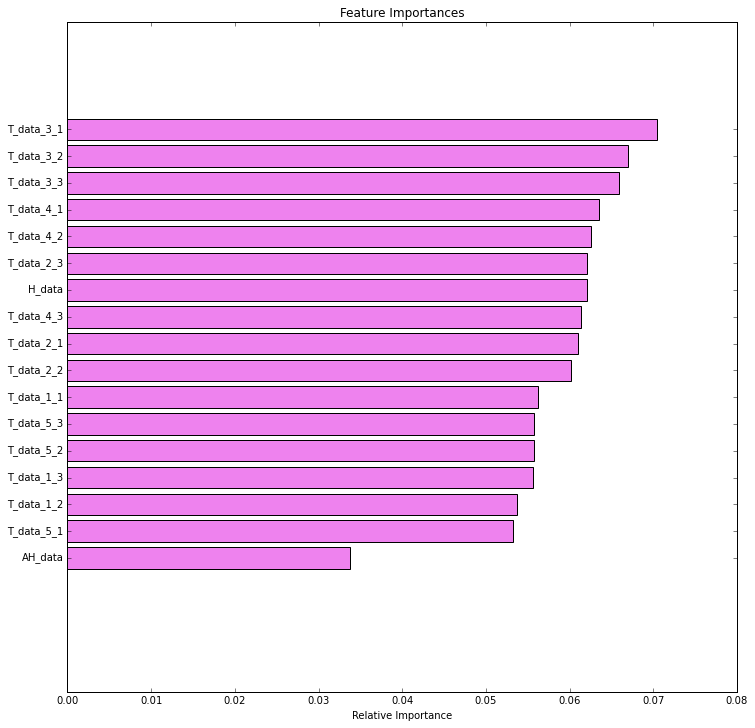

<IPython.core.display.Javascript object>

In [163]:
feature_names = X_train.columns
importances = tuned_rf2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [164]:
Model = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        (
            "Random forest",
            RandomForestClassifier(
                max_features="sqrt",
                random_state=1,
                max_samples=0.5000000000000001,
                n_estimators=250,
                min_samples_leaf=1,
            ),
        ),
    ]
)

<IPython.core.display.Javascript object>

In [183]:
# Separating target variable and other variables
X1 = df.drop(columns="quality")
Y1 = df["quality"]

<IPython.core.display.Javascript object>

In [185]:
# We can't oversample data without doing missing value treatment, so lets first treat missing values in train set
imputer = SimpleImputer(strategy="median")
X1 = imputer.fit_transform(X1)

# we don't need to impute missing values in test set as it will be done inside the pipeline


<IPython.core.display.Javascript object>

In [186]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_over1, y_over1 = sm.fit_resample(X1, Y1)

<IPython.core.display.Javascript object>

In [187]:
Model.fit(X_over1, y_over1)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('Random forest',
                 RandomForestClassifier(max_features='sqrt',
                                        max_samples=0.5000000000000001,
                                        n_estimators=250, random_state=1))])

<IPython.core.display.Javascript object>

In [191]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 1].set_title("Boxplot w.r.t target" + str(target_uniq[1]))
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot ( without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

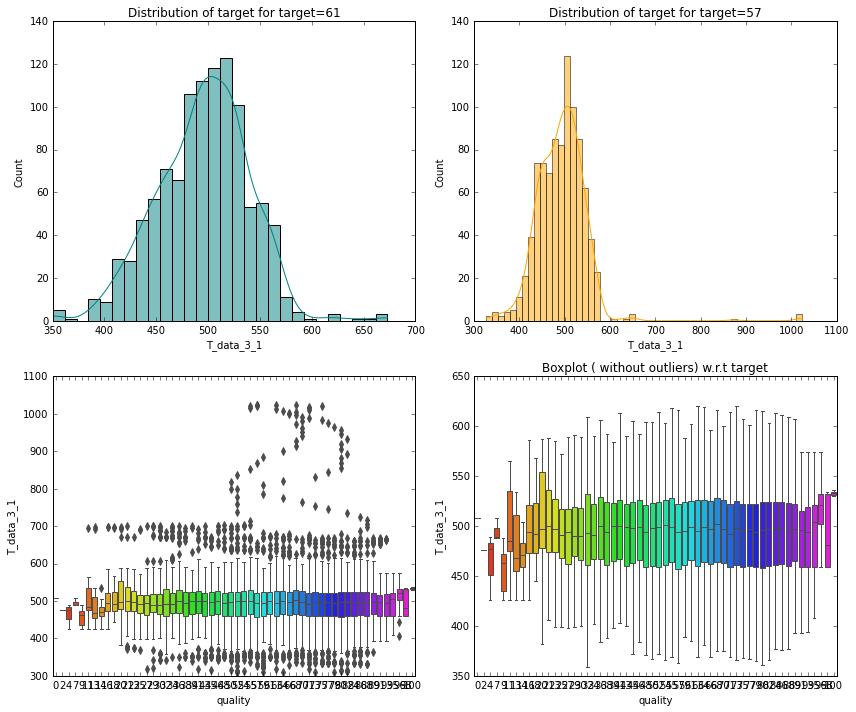

<IPython.core.display.Javascript object>

In [192]:
distribution_plot_wrt_target(data, "T_data_3_1", "quality")

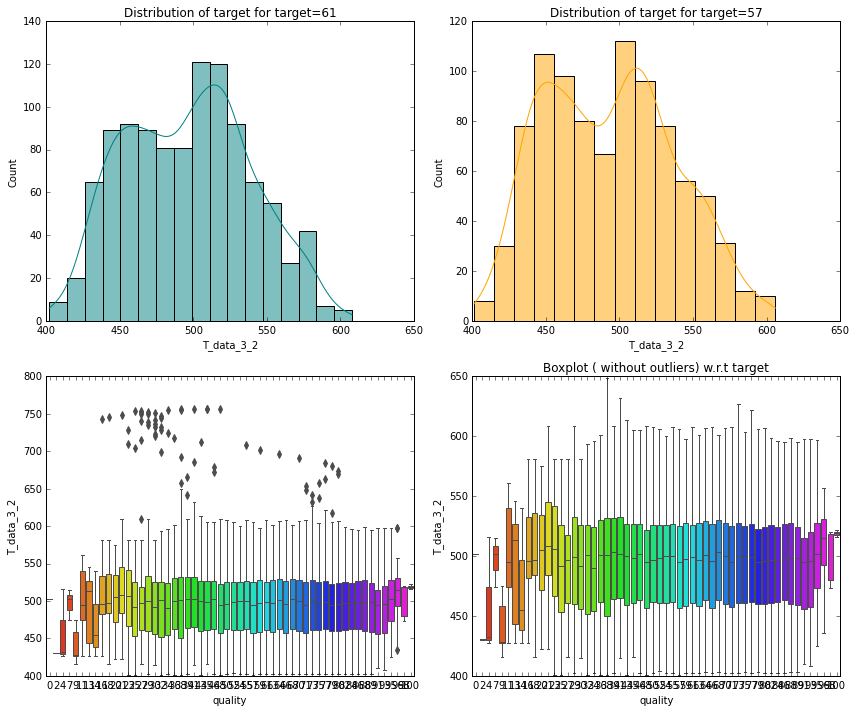

<IPython.core.display.Javascript object>

In [193]:
distribution_plot_wrt_target(data, "T_data_3_2", "quality")

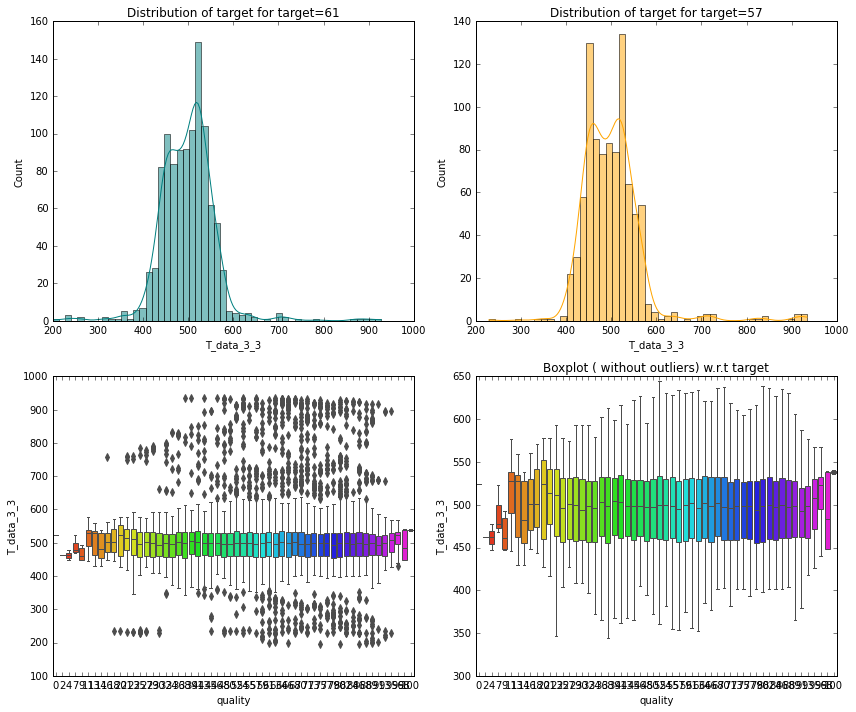

<IPython.core.display.Javascript object>

In [194]:
distribution_plot_wrt_target(data, "T_data_3_3", "quality")

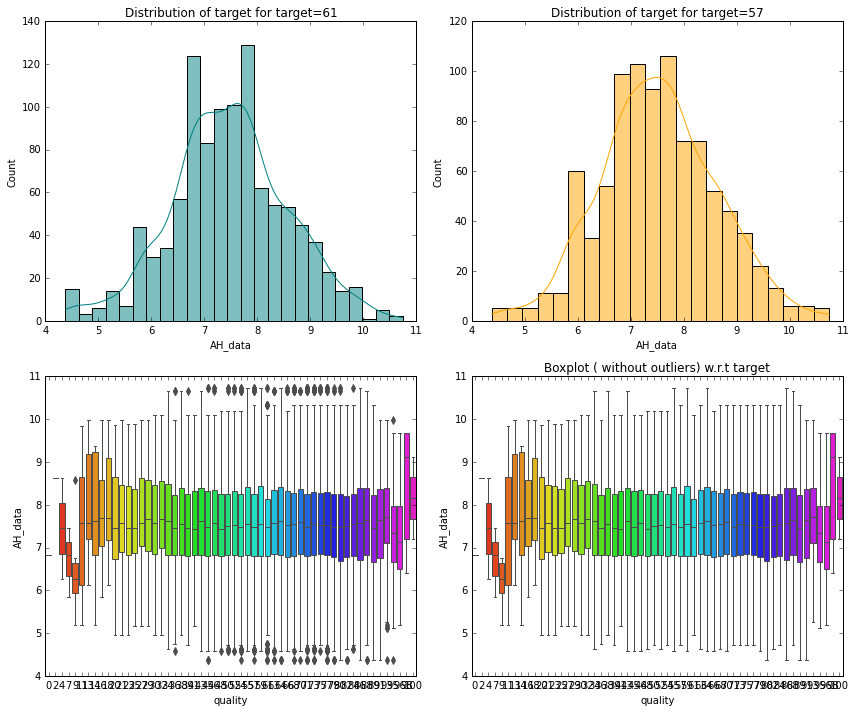

<IPython.core.display.Javascript object>

In [195]:
distribution_plot_wrt_target(data, "AH_data", "quality")

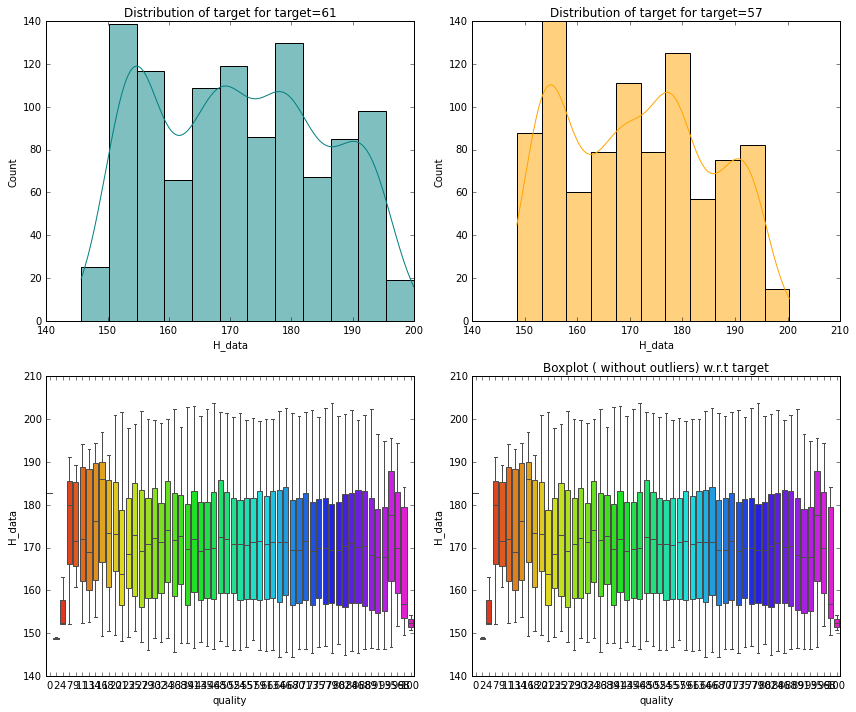

<IPython.core.display.Javascript object>

In [196]:
distribution_plot_wrt_target(data, "H_data", "quality")

### Linear Regression on original data

* with linear regression- one would not alter the "quality" data set, and we would use that as our dependent variable
* which is why we created df2 copy
* linear regression is harmed by outliers, however since we are not using outlier treatment on the other models- we will refrain from using it . It may be a helpful excercize to investigate this further individually.
####  ***  Placing at the end , due to earlier run, and noticed it was completely out of scope due to terrible performance*****

In [47]:
# Copy all the predictor variables into X dataframe. Since 'quality' is dependent variable drop it
X = df2.drop("quality", axis=1)
# Copy the 'quality' column alone into the y dataframe. This is the dependent variable
y = df2[["quality"]]

<IPython.core.display.Javascript object>

In [48]:
# Let us break the X and y dataframes into training set and test set. For this we will use
# Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

<IPython.core.display.Javascript object>

In [49]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

### Missing Value Treatment- Linear Regression

In [50]:
# Let's impute the missing values
imp_mode = SimpleImputer(missing_values=np.nan, strategy="median")
cols_to_impute = ["H_data", "AH_data"]

# fit and transform the imputer on train data
X_train[cols_to_impute] = imp_mode.fit_transform(X_train[cols_to_impute])

# Transform on validation and test data
X_val[cols_to_impute] = imp_mode.transform(X_val[cols_to_impute])

# fit and transform the imputer on test data
X_test[cols_to_impute] = imp_mode.transform(X_test[cols_to_impute])

<IPython.core.display.Javascript object>

In [51]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())
print("-" * 30)

T_data_1_1    0
T_data_1_2    0
T_data_1_3    0
T_data_2_1    0
T_data_2_2    0
T_data_2_3    0
T_data_3_1    0
T_data_3_2    0
T_data_3_3    0
T_data_4_1    0
T_data_4_2    0
T_data_4_3    0
T_data_5_1    0
T_data_5_2    0
T_data_5_3    0
H_data        0
AH_data       0
dtype: int64
------------------------------
T_data_1_1    0
T_data_1_2    0
T_data_1_3    0
T_data_2_1    0
T_data_2_2    0
T_data_2_3    0
T_data_3_1    0
T_data_3_2    0
T_data_3_3    0
T_data_4_1    0
T_data_4_2    0
T_data_4_3    0
T_data_5_1    0
T_data_5_2    0
T_data_5_3    0
H_data        0
AH_data       0
dtype: int64
------------------------------
T_data_1_1    0
T_data_1_2    0
T_data_1_3    0
T_data_2_1    0
T_data_2_2    0
T_data_2_3    0
T_data_3_1    0
T_data_3_2    0
T_data_3_3    0
T_data_4_1    0
T_data_4_2    0
T_data_4_3    0
T_data_5_1    0
T_data_5_2    0
T_data_5_3    0
H_data        0
AH_data       0
dtype: int64
------------------------------


<IPython.core.display.Javascript object>

In [52]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [53]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print(
        "The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx])
    )

The coefficient for T_data_1_1 is -0.018890629824997455
The coefficient for T_data_1_2 is 0.07097846754916205
The coefficient for T_data_1_3 is -0.041344047121468316
The coefficient for T_data_2_1 is -0.008876220285636834
The coefficient for T_data_2_2 is 0.011450905277381693
The coefficient for T_data_2_3 is 0.005820524099918372
The coefficient for T_data_3_1 is 0.0002109854319880779
The coefficient for T_data_3_2 is -0.01458978637885851
The coefficient for T_data_3_3 is 0.0033699438985958325
The coefficient for T_data_4_1 is 0.009627839644505474
The coefficient for T_data_4_2 is -0.016083306349887503
The coefficient for T_data_4_3 is -0.01172765195537414
The coefficient for T_data_5_1 is -0.05772458278727228
The coefficient for T_data_5_2 is 0.021110260091560386
The coefficient for T_data_5_3 is 0.04075942584757405
The coefficient for H_data is -0.027366412521685556
The coefficient for AH_data is -0.3493944269919982


<IPython.core.display.Javascript object>

In [54]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 76.65057286456285


<IPython.core.display.Javascript object>

In [55]:
regression_model.score(X_train, y_train)

0.01148921316977225

<IPython.core.display.Javascript object>

In [56]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS

regression_model.score(X_test, y_test)

0.00813358056073521

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='T_data_5_3', ylabel='quality'>

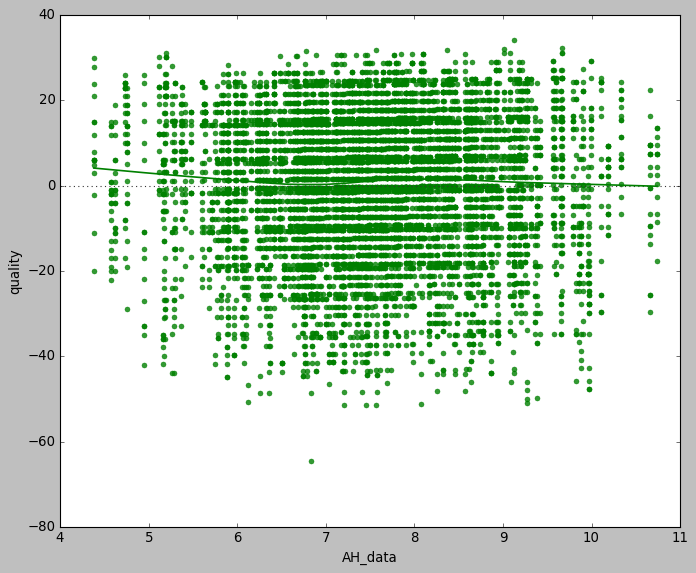

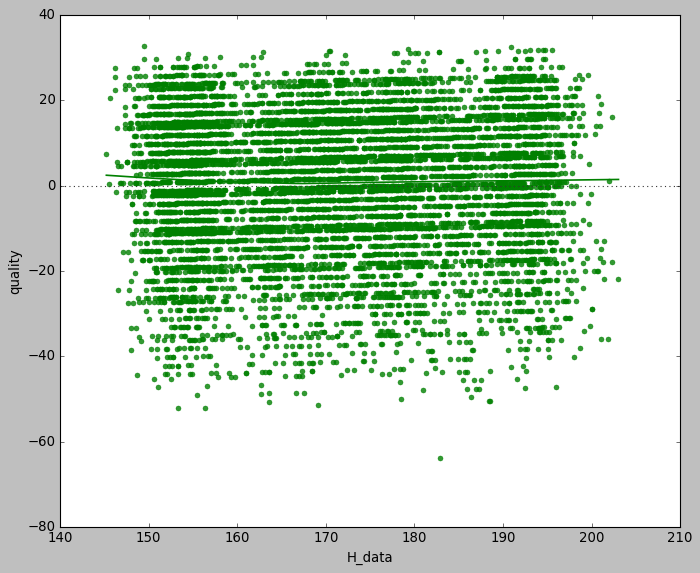

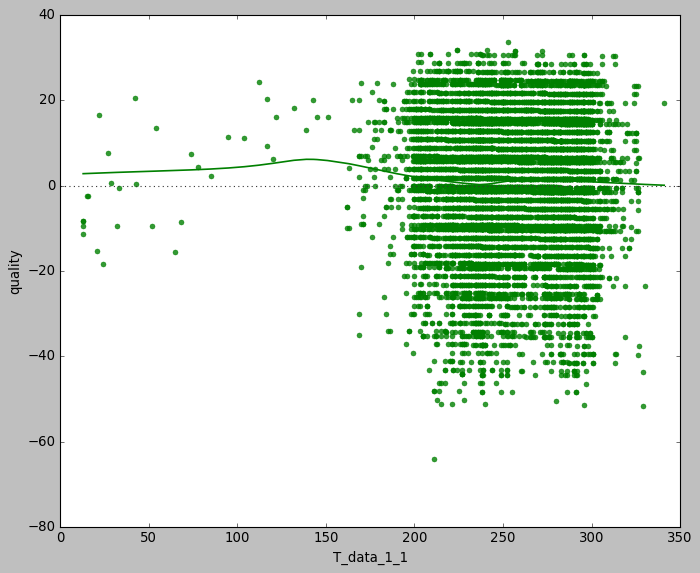

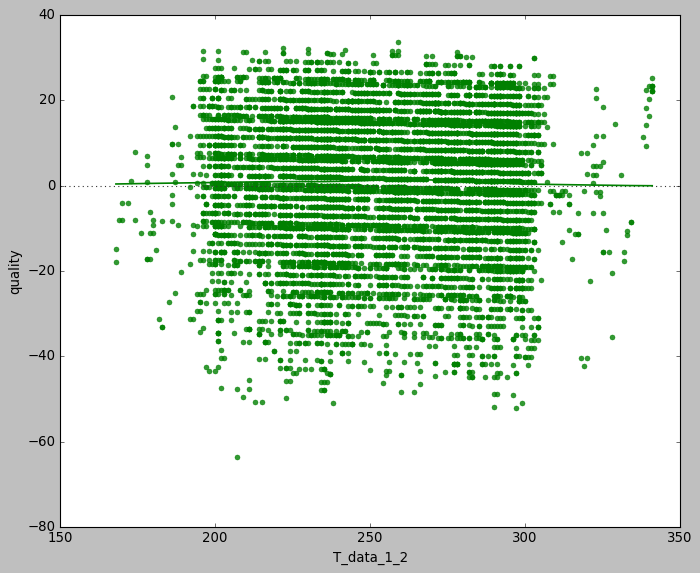

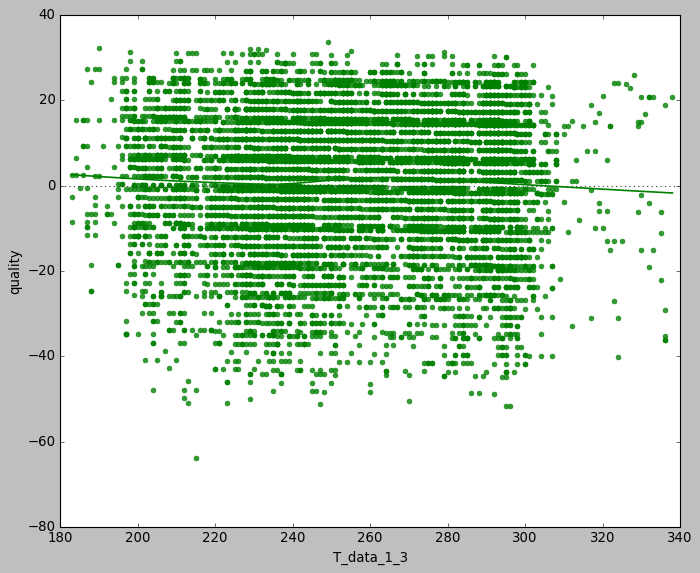

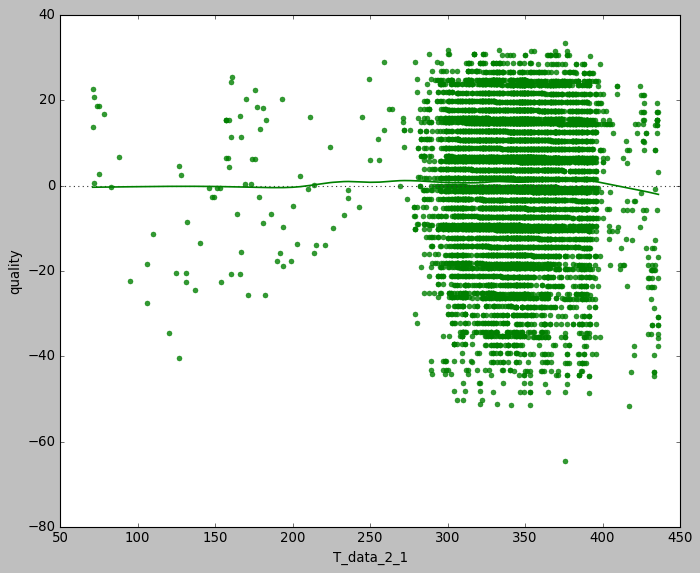

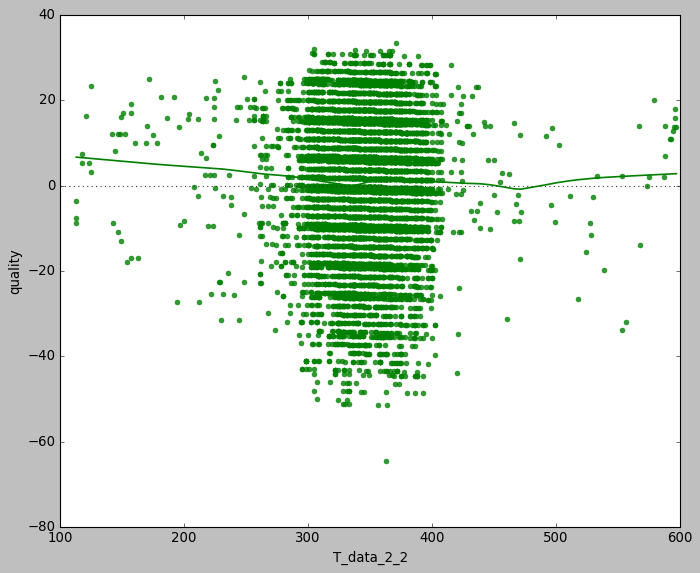

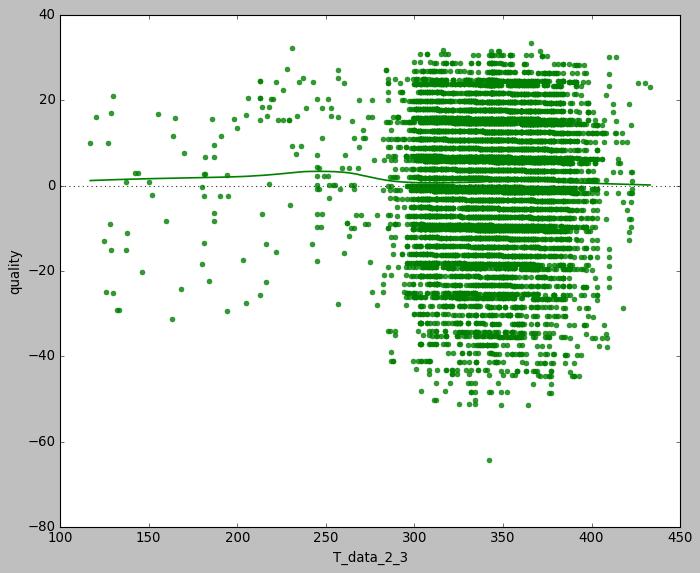

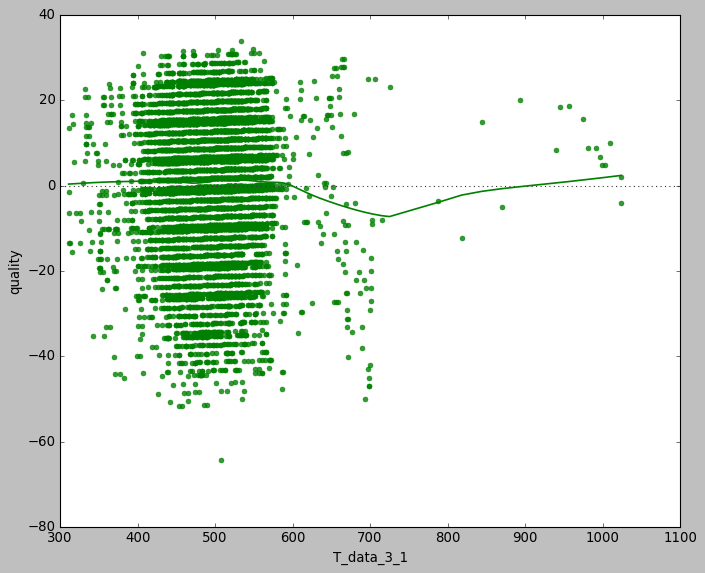

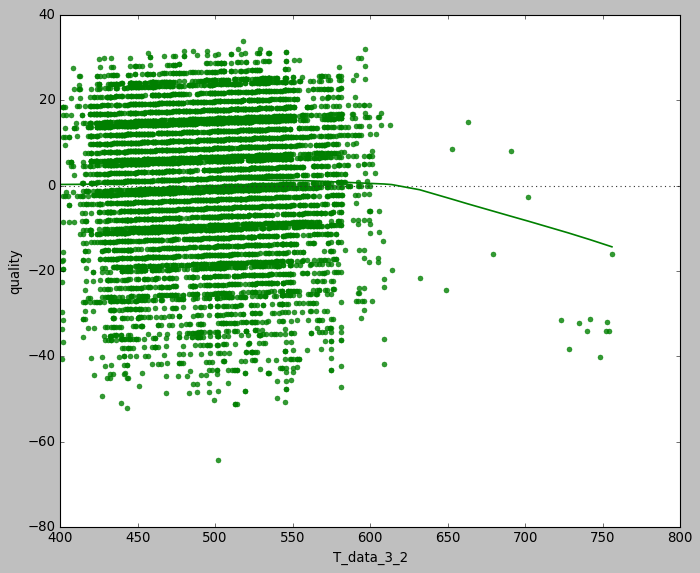

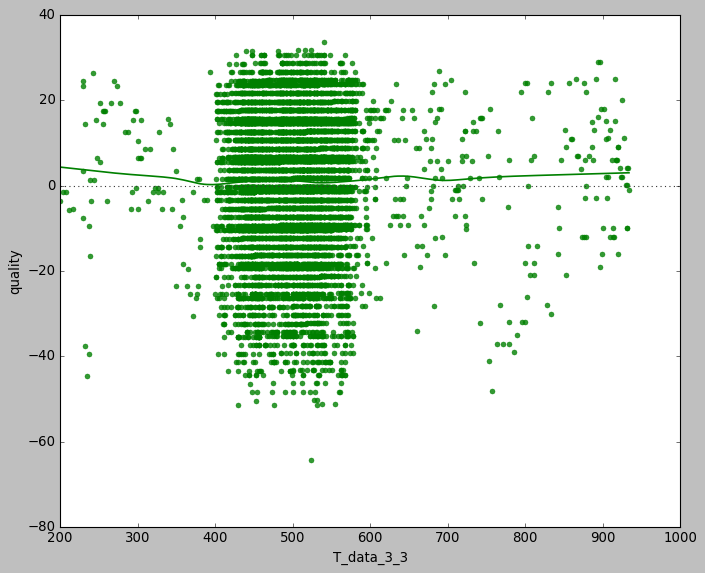

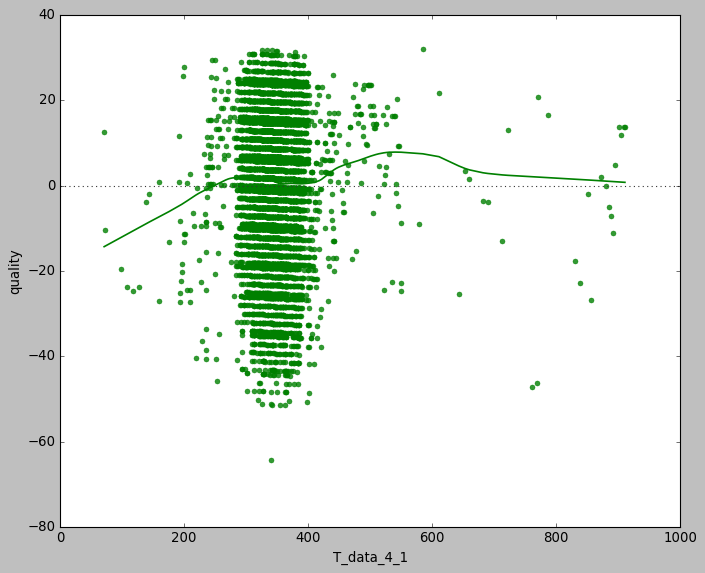

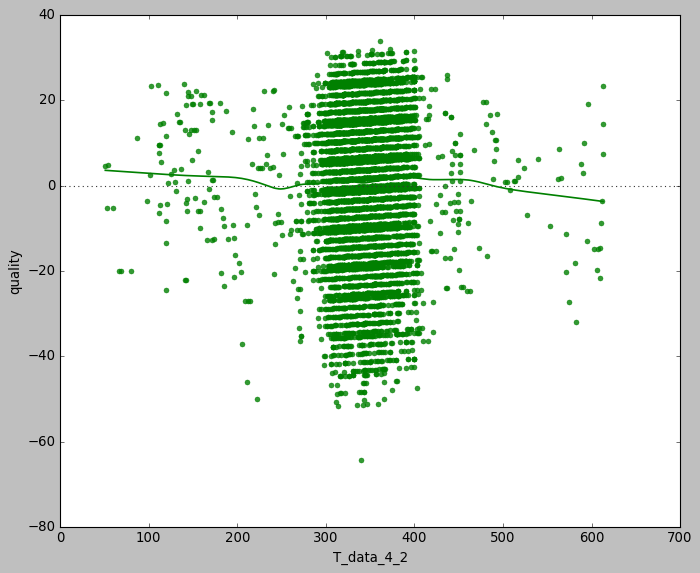

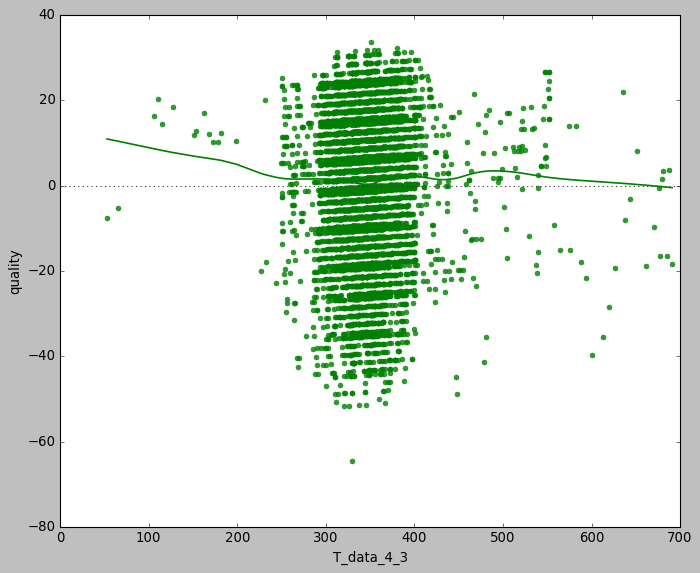

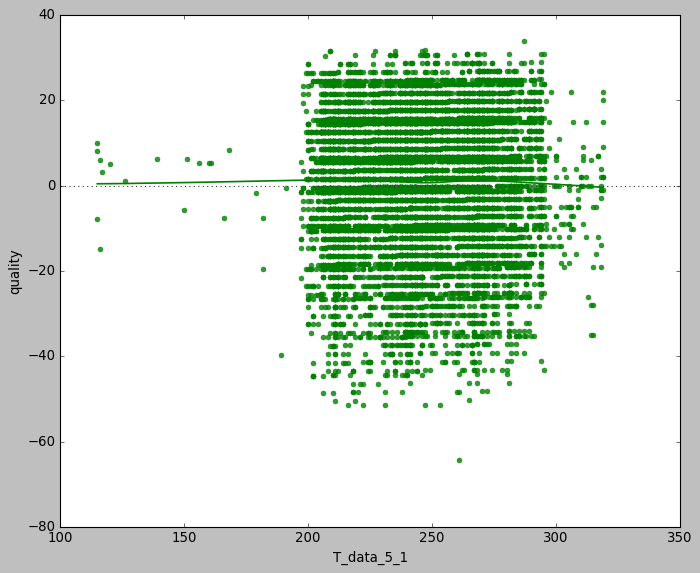

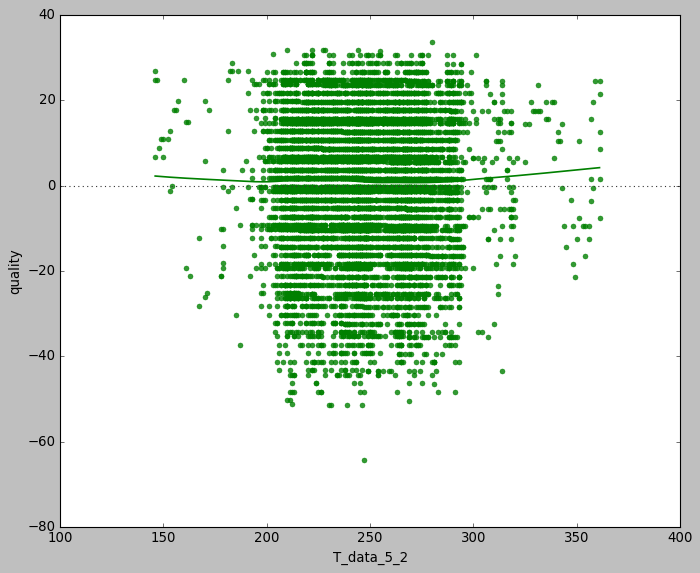

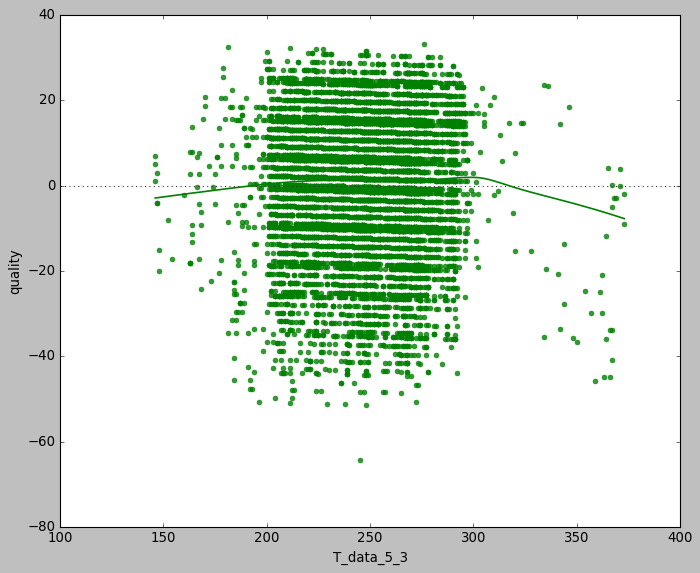

<IPython.core.display.Javascript object>

In [61]:
# Is OLS a good model ? Should we building a simple linear model ? Check the residuals for each predictor.

fig = plt.figure(figsize=(10, 8))
sns.residplot(x=X_test["AH_data"], y=y_test["quality"], color="green", lowess=True)


fig = plt.figure(figsize=(10, 8))
sns.residplot(x=X_test["H_data"], y=y_test["quality"], color="green", lowess=True)

fig = plt.figure(figsize=(10, 8))
sns.residplot(x=X_test["T_data_1_1"], y=y_test["quality"], color="green", lowess=True)

fig = plt.figure(figsize=(10, 8))
sns.residplot(x=X_test["T_data_1_2"], y=y_test["quality"], color="green", lowess=True)

fig = plt.figure(figsize=(10, 8))
sns.residplot(x=X_test["T_data_1_3"], y=y_test["quality"], color="green", lowess=True)

fig = plt.figure(figsize=(10, 8))
sns.residplot(x=X_test["T_data_2_1"], y=y_test["quality"], color="green", lowess=True)

fig = plt.figure(figsize=(10, 8))
sns.residplot(x=X_test["T_data_2_2"], y=y_test["quality"], color="green", lowess=True)

fig = plt.figure(figsize=(10, 8))
sns.residplot(x=X_test["T_data_2_3"], y=y_test["quality"], color="green", lowess=True)

fig = plt.figure(figsize=(10, 8))
sns.residplot(x=X_test["T_data_3_1"], y=y_test["quality"], color="green", lowess=True)

fig = plt.figure(figsize=(10, 8))
sns.residplot(x=X_test["T_data_3_2"], y=y_test["quality"], color="green", lowess=True)

fig = plt.figure(figsize=(10, 8))
sns.residplot(x=X_test["T_data_3_3"], y=y_test["quality"], color="green", lowess=True)

fig = plt.figure(figsize=(10, 8))
sns.residplot(x=X_test["T_data_4_1"], y=y_test["quality"], color="green", lowess=True)

fig = plt.figure(figsize=(10, 8))
sns.residplot(x=X_test["T_data_4_2"], y=y_test["quality"], color="green", lowess=True)

fig = plt.figure(figsize=(10, 8))
sns.residplot(x=X_test["T_data_4_3"], y=y_test["quality"], color="green", lowess=True)


fig = plt.figure(figsize=(10, 8))
sns.residplot(x=X_test["T_data_5_1"], y=y_test["quality"], color="green", lowess=True)

fig = plt.figure(figsize=(10, 8))
sns.residplot(x=X_test["T_data_5_2"], y=y_test["quality"], color="green", lowess=True)

fig = plt.figure(figsize=(10, 8))
sns.residplot(x=X_test["T_data_5_3"], y=y_test["quality"], color="green", lowess=True)

In [ ]:
# there seems to be a very weak linear relationship

In [62]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use 
# statsmodel, a library that gives results similar to
# what you obtain in R language
# This library expects the X and Y to be given in one single dataframe

data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

T_data_1_1  T_data_1_2  T_data_1_3  T_data_2_1  T_data_2_2  T_data_2_3  \
11861         267         254         257         342         331         312   
12700         285         292         242         334         335         329   
23744         246         254         250         390         391         395   
17181         301         294         291         418         371         366   
21914         206         188         209         325         334         307   

       T_data_3_1  T_data_3_2  T_data_3_3  T_data_4_1  T_data_4_2  T_data_4_3  \
11861         497         499         492         367         372         401   
12700         510         442         436         322         320         331   
23744         516         523         510         304         322         315   
17181         343         490         483         359         380         375   
21914         442         448         448         322         327         329   

       T_data_5_1  T_data_5_2  T_data_5_3  H_data  AH_data  quality  
11861         207         217         212 189.780    6.840       84  
12700         208         210         271 178.110    9.580       77  
23744         212         211         225 186.960    7.580       66  
17181         260         240         246 151.010    6.710       59  
21914         275         266         268 163.660    7.000       70

<IPython.core.display.Javascript object>

In [71]:
# Numerical libraries
import numpy as np

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns
import pandas as pd

# importing ploting libraries
import matplotlib.pyplot as plt
import matplotlib.style

plt.style.use("classic")

# importing seaborn for statistical plots
import seaborn as sns

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

<IPython.core.display.Javascript object>

In [78]:
import statsmodels.formula.api as smf

lm1 = smf.ols(
    formula="quality ~ T_data_1_1+T_data_1_2+T_data_1_3+T_data_2_1+T_data_2_2+T_data_2_3+T_data_3_1+T_data_3_2+T_data_3_3+T_data_4_1+T_data_4_2+T_data_4_3+T_data_5_1+T_data_5_2+T_data_5_3+H_data+AH_data",
    data=data_train,
).fit()
lm1.params

Intercept    76.651
T_data_1_1   -0.019
T_data_1_2    0.071
T_data_1_3   -0.041
T_data_2_1   -0.009
T_data_2_2    0.011
T_data_2_3    0.006
T_data_3_1    0.000
T_data_3_2   -0.015
T_data_3_3    0.003
T_data_4_1    0.010
T_data_4_2   -0.016
T_data_4_3   -0.012
T_data_5_1   -0.058
T_data_5_2    0.021
T_data_5_3    0.041
H_data       -0.027
AH_data      -0.349
dtype: float64

<IPython.core.display.Javascript object>

In [79]:
print(lm1.summary())  # Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     13.93
Date:                Sun, 02 Jan 2022   Prob (F-statistic):           1.87e-40
Time:                        21:39:28   Log-Likelihood:                -85918.
No. Observations:               20391   AIC:                         1.719e+05
Df Residuals:                   20373   BIC:                         1.720e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     76.6506      3.749     20.445      0.0

<IPython.core.display.Javascript object>

In [80]:
# Let us check the sum of squared errors by predicting value of y for test cases and
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test) - y_test) ** 2)

<IPython.core.display.Javascript object>

In [81]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

16.20312361537936

<IPython.core.display.Javascript object>

In [ ]:
# so there is avg of 16.2 (roundoff) quality difference from real quality difference on an avg

In [82]:
# predict quality for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

<IPython.core.display.Javascript object>

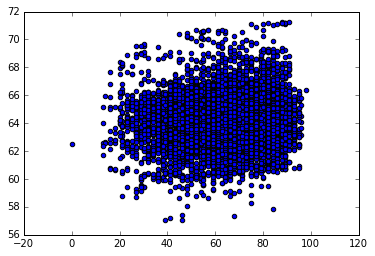

<IPython.core.display.Javascript object>

In [83]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
#plt.rcParams['figure.dpi'] = 500



plt.scatter(y_test['quality'], y_pred)



In [202]:
# Linear Regression is clearly not a good model for this as the graph shows above.

<IPython.core.display.Javascript object>

# Business Insights and Conclusions

* Random Forest provided the most consistant and in the end the best overall working model. 
* Consistancy of Random forest - for both under and over sampling - the performance on train and validation was very close and convincing 
* Linear Regression is not a good model for this particular work. As you can see quickly in the graphs - there is no or a very small linear relationship
* T_data_3_1,T_data_3_2, and T_data_3_3 respectively were the most important features, however Humidity also is a strong feature
   * consideration of keeping the humidity around 171(median) seems to have a relative importance. 